## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#Read provided dataset

inp1 = pd.read_csv("application_data.csv")
inp1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
inp1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [6]:
# Shape of data set
inp1.shape

(307511, 122)

# Data Cleaning

In [7]:
# calculating the percentage of null values in inp1 and storing the result in new dataframe df1
df1 = (inp1.isnull().sum()/307511)*100

In [8]:
# Need to check how many columns fall in each category
print("Number of columns with missing value percentage greater than 30 :",df1[df1>30].count())
print("Number of columns with missing value percentage greater than 40 :",df1[df1>40].count())
print("Number of columns with missing value percentage greater than 45 :",df1[df1>45].count())
print("Number of columns with missing value percentage greater than 50 :",df1[df1>50].count())

Number of columns with missing value percentage greater than 30 : 50
Number of columns with missing value percentage greater than 40 : 49
Number of columns with missing value percentage greater than 45 : 49
Number of columns with missing value percentage greater than 50 : 41


#### The count for Greater than 40 and 45 is the same which means most of the columns have percentage values greater than 45 (Closer to 50). Which we can reviewed for dropping/keeping after checking what these columns consist of.

In [9]:
# Checking the columns/column names for percentage greater than 45
df1[df1>45]

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [10]:
# Checking the columns/column names for percentage greater than 50
print(df1[df1>50].count())
df1[df1>50]

41


OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [11]:
# Apart from own_car_age and ext_source_1 almost all of the values describe the client building/apartment and the \n
# mean/median/mode of its dimensions, other utilities etc.
df1[df1>50].index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [12]:
# dropping 41 columns from the dataset

inp1.drop(df1[df1>50].index,axis=1,inplace=True)
inp1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [13]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [14]:
# checking for columns where null values can be imputed
df1 = (inp1.isnull().sum()/307511)*100

In [15]:
df1[df1>0].sort_values(ascending=False)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [16]:
# Checking the columns having more than 45 percent null values

inp1[['FLOORSMAX_AVG','FLOORSMAX_MODE','FLOORSMAX_MEDI','YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI','TOTALAREA_MODE']].describe()

FLOORSMAX_AVG  FLOORSMAX_MODE  FLOORSMAX_MEDI  \
count  154491.000000   154491.000000   154491.000000   
mean        0.226282        0.222315        0.225897   
std         0.144641        0.143709        0.145067   
min         0.000000        0.000000        0.000000   
25%         0.166700        0.166700        0.166700   
50%         0.166700        0.166700        0.166700   
75%         0.333300        0.333300        0.333300   
max         1.000000        1.000000        1.000000   

       YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE  \
count                157504.000000                 157504.000000   
mean                      0.977735                      0.977065   
std                       0.059223                      0.064575   
min                       0.000000                      0.000000   
25%                       0.976700                      0.976700   
50%                       0.981600                      0.981600   
75%                       0.986600                      0.986600   
max                       1.000000                      1.000000   

       YEARS_BEGINEXPLUATATION_MEDI  TOTALAREA_MODE  
count                 157504.000000   159080.000000  
mean                       0.977752        0.102547  
std                        0.059897        0.107462  
min                        0.000000        0.000000  
25%                        0.976700        0.041200  
50%                        0.981600        0.068800  
75%                        0.986600        0.127600  
max                        1.000000        1.000000

In [17]:
# For FLOORSMAX_AVG, FLOORSMAX_MODE, FLOORSMAX_MEDI and TOTALAREA_MODE there is visible diffrence in mean and median which shows data is skewed so we will impute nulls with median in these columns.
# For YEARS_BEGINEXPLUATATION_AVG, YEARS_BEGINEXPLUATATION_MODE and YEARS_BEGINEXPLUATATION_MEDI the mean and median values are very close hence we will impute null with mean in these columns.

inp1.FLOORSMAX_AVG.fillna(inp1.FLOORSMAX_AVG.median(), inplace=True)
inp1.FLOORSMAX_MODE.fillna(inp1.FLOORSMAX_MODE.median(), inplace=True)
inp1.FLOORSMAX_MEDI.fillna(inp1.FLOORSMAX_MEDI.median(), inplace=True)
inp1.TOTALAREA_MODE.fillna(inp1.TOTALAREA_MODE.median(), inplace=True)

In [18]:
inp1.YEARS_BEGINEXPLUATATION_AVG.fillna(inp1.YEARS_BEGINEXPLUATATION_AVG.mean(), inplace=True)
inp1.YEARS_BEGINEXPLUATATION_MODE.fillna(inp1.YEARS_BEGINEXPLUATATION_MODE.mean(), inplace=True)
inp1.YEARS_BEGINEXPLUATATION_MEDI.fillna(inp1.YEARS_BEGINEXPLUATATION_MEDI.mean(), inplace=True)

In [19]:
inp1.EMERGENCYSTATE_MODE.value_counts(normalize=True)

No     0.985608
Yes    0.014392
Name: EMERGENCYSTATE_MODE, dtype: float64

In [20]:
# Here since EMERGENCYSTATE_MODE is a categorical variable we'll use mode to impute null values. As can be seen above the 'No' value is aalmost 98 percent with a miniscule 0.01 for 'Yes'
#inp1.EMERGENCYSTATE_MODE.mode()[0]

inp1.EMERGENCYSTATE_MODE.fillna(inp1.EMERGENCYSTATE_MODE.mode()[0], inplace=True)

In [21]:
# Let's check column null values again
df1 = (inp1.isnull().sum()/307511)*100
df1[df1>0].sort_values(ascending=False)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

In [22]:
inp1[inp1.OCCUPATION_TYPE.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8           100011       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
28          100033       0         Cash loans           M            Y   
30          100035       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307486      456230       0         Cash loans           F            Y   
307487      456231       0         Cash loans           M            N   
307500      456244       0         Cash loans           F            N   
307505      456249       0         Cash loans           F            N   
307507      456252       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
8                    Y             0        112500.000   1019610.0   
11                   Y             0         38419.155    148365.0   
23                   Y             0         83250.000    239850.0   
28                   Y             0        270000.000    790830.0   
30                   Y             0        292500.000    665892.0   
...                ...           ...               ...         ...   
307486               Y             1        292500.000    355536.0   
307487               Y             0        117000.000   1071909.0   
307500               Y             0        261000.000   1303812.0   
307505               Y             0        112500.000    225000.0   
307507               Y             0         72000.000    269550.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
8           33826.5         913500.0        Children             Pensioner   
11          10678.5         135000.0        Children             Pensioner   
23          23850.0         225000.0   Unaccompanied             Pensioner   
28          57676.5         675000.0   Unaccompanied         State servant   
30          24592.5         477000.0   Unaccompanied  Commercial associate   
...             ...              ...             ...                   ...   
307486      18283.5         270000.0   Unaccompanied  Commercial associate   
307487      31473.0         936000.0   Unaccompanied             Pensioner   
307500      35982.0        1138500.0   Unaccompanied               Working   
307505      22050.0         225000.0   Unaccompanied             Pensioner   
307507      12001.5         225000.0   Unaccompanied             Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
8       Secondary / secondary special               Married   
11      Secondary / secondary special               Married   
23      Secondary / secondary special               Married   
28                   Higher education  Single / not married   
30      Secondary / secondary special        Civil marriage   
...                               ...                   ...   
307486               Higher education        Civil marriage   
307487  Secondary / secondary special               Married   
307500               Higher education               Married   
307505  Secondary / secondary special  Single / not married   
307507  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
8       House / apartment                    0.018634      -20099   
11      House / apartment                    0.015221      -20417   
23      House / apartment                    0.006296      -24827   
28      House / apartment                    0.046220       -9994   
30      House / apartment                    0.025164      -15280   
...                   ...                         ...         ...   
307486  House / apartment                    0.072508      -16010   
307487  House / apartment       

In [23]:
inp1[inp1.OCCUPATION_TYPE.isnull()]['NAME_INCOME_TYPE'].value_counts()

Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

In [24]:
inp1['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [25]:
inp1[inp1.OCCUPATION_TYPE.isnull()]['ORGANIZATION_TYPE'].value_counts()

XNA                       55372
Business Entity Type 3    14337
Other                      5192
Self-employed              3545
Business Entity Type 2     2265
Government                 2083
School                     1443
Business Entity Type 1     1310
Medicine                   1073
Transport: type 4           935
Construction                652
Military                    550
Industry: type 9            525
Industry: type 11           523
Kindergarten                498
Security Ministries         484
Industry: type 3            438
Trade: type 7               433
Housing                     417
Agriculture                 370
University                  306
Transport: type 2           283
Police                      257
Hotel                       247
Trade: type 3               238
Security                    234
Bank                        233
Industry: type 7            215
Industry: type 4            177
Restaurant                  164
Industry: type 1            153
Services

In [26]:
# Replace all values having name_income_type as pensioner to Retired in occupation_type column other than that there dosen't look any major relation here
# Since there is a large diversity in occupation type for other name income type categories, replacing rest values with 'Occupation Missing'

inp1['OCCUPATION_TYPE'] = np.where(inp1['NAME_INCOME_TYPE'] == 'Pensioner','Retired',inp1['OCCUPATION_TYPE'])
inp1['OCCUPATION_TYPE'].fillna('Occupation Missing',inplace=True)

In [27]:
# Let's check column null values again
df1 = (inp1.isnull().sum()/307511)*100
df1[df1>0].sort_values(ascending=False)

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

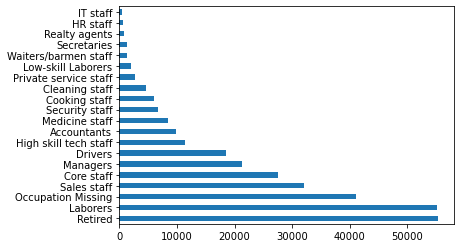

In [28]:
inp1.OCCUPATION_TYPE.value_counts().plot.barh()
plt.show()

In [29]:
inp1[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

In [30]:
inp1.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [31]:
inp1.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [32]:
inp1.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)*100

0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [33]:
inp1.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)*100

0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
27.0     0.000376
22.0     0.000376
23.0     0.000376
24.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [34]:
inp1.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)*100

0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
8.0       0.002632
7.0       0.002632
19.0      0.000376
261.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [35]:
inp1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)*100

0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
18.0     0.001504
19.0     0.001504
16.0     0.001128
25.0     0.000376
21.0     0.000376
22.0     0.000376
20.0     0.000376
23.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [36]:
# Most of the creadit bureau investigation have value of 0.0 for hour,day,week,month and quarter. Only exception is year but there as well maximum people approx 26.9 percent have a value of 0.0
# Sine 0.0 is the most frequent value, replace the null values with 0.0 for the 6 columns
# Also in AMT_REQ_CREDIT_BUREAU_QRT the max value is very large (Observation)

inp1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(0,inplace=True)
inp1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(0,inplace=True)
inp1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0,inplace=True)
inp1.AMT_REQ_CREDIT_BUREAU_MON.fillna(0,inplace=True)
inp1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(0,inplace=True)
inp1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0,inplace=True)

In [37]:
inp1[['EXT_SOURCE_2','EXT_SOURCE_3']].describe()

EXT_SOURCE_2   EXT_SOURCE_3
count  3.068510e+05  246546.000000
mean   5.143927e-01       0.510853
std    1.910602e-01       0.194844
min    8.173617e-08       0.000527
25%    3.924574e-01       0.370650
50%    5.659614e-01       0.535276
75%    6.636171e-01       0.669057
max    8.549997e-01       0.896010

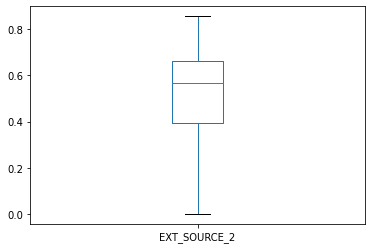

In [38]:
inp1.EXT_SOURCE_2.plot.box()
plt.show()

In [39]:
print(inp1.EXT_SOURCE_2.median())
print(inp1.EXT_SOURCE_2.mean())

0.5659614260608526
0.5143926741308463


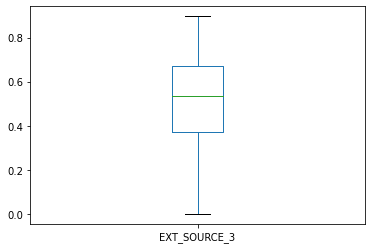

In [40]:
inp1.EXT_SOURCE_3.plot.box()
plt.show()

In [41]:
print(inp1.EXT_SOURCE_3.median())
print(inp1.EXT_SOURCE_3.mean())

0.5352762504724826
0.5108529061800121


In [42]:
# Since there is a difference in the mean and median will impute values with median( no outliers can be seen in the boxplot)

inp1.EXT_SOURCE_3.fillna(inp1.EXT_SOURCE_3.median(),inplace=True)
inp1.EXT_SOURCE_2.fillna(inp1.EXT_SOURCE_2.median(),inplace=True)

In [43]:
# Let's check column null values again
df1 = (inp1.isnull().sum()/307511)*100
df1[df1>0].sort_values(ascending=False)

NAME_TYPE_SUITE             0.420148
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
AMT_GOODS_PRICE             0.090403
AMT_ANNUITY                 0.003902
CNT_FAM_MEMBERS             0.000650
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

In [44]:
inp1.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
24.0      0.003589
25.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
348.0     0.000326
28.0      0.000326
47.0      0.000326
29.0      0.000326
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [45]:
inp1.DEF_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

0.0     88.526216
1.0      9.242716
2.0      1.736761
3.0      0.388920
4.0      0.082548
5.0      0.018271
6.0      0.003589
8.0      0.000326
7.0      0.000326
34.0     0.000326
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [46]:
inp1.OBS_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

0.0      53.726386
1.0      15.945055
2.0       9.711899
3.0       6.595647
4.0       4.550230
5.0       3.087540
6.0       2.071519
7.0       1.417338
8.0       0.941629
9.0       0.639173
10.0      0.435577
11.0      0.273092
12.0      0.202290
13.0      0.130836
14.0      0.077653
15.0      0.054162
16.0      0.044700
17.0      0.023818
18.0      0.015987
19.0      0.014356
20.0      0.009788
21.0      0.009136
22.0      0.006525
23.0      0.004242
24.0      0.003915
25.0      0.003589
27.0      0.001631
29.0      0.000653
26.0      0.000326
28.0      0.000326
344.0     0.000326
47.0      0.000326
30.0      0.000326
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [47]:
inp1.DEF_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

0.0     91.592222
1.0      7.126171
2.0      1.034291
3.0      0.195112
4.0      0.044047
5.0      0.006525
6.0      0.000979
7.0      0.000326
24.0     0.000326
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [48]:
inp1[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   1.405292                  0.100049  
std                    2.379803                  0.362291  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

In [49]:
# replacing with most frequent value 
inp1.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)
inp1.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)
inp1.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)
inp1.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)

In [50]:
inp1.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [51]:
# Since it's not normal behaviour to change phone often and mean and median values are not same will replace null values with median
inp1.DAYS_LAST_PHONE_CHANGE.fillna(inp1.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)

In [52]:
inp1.NAME_TYPE_SUITE.value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [53]:
inp1.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [54]:
# most people were Unaccompanied during application process
inp1.NAME_TYPE_SUITE.fillna(inp1.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [55]:
# Let's check column null values again
df1 = (inp1.isnull().sum()/307511)*100
df1[df1>0].sort_values(ascending=False)

AMT_GOODS_PRICE    0.090403
AMT_ANNUITY        0.003902
CNT_FAM_MEMBERS    0.000650
dtype: float64

In [56]:
inp1.CNT_FAM_MEMBERS.isnull().sum()

2

In [57]:
inp1[inp1.CNT_FAM_MEMBERS.isnull()][['CNT_CHILDREN','NAME_FAMILY_STATUS']]

CNT_CHILDREN NAME_FAMILY_STATUS
41982              0            Unknown
187348             0            Unknown

In [58]:
inp1.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
16.0         2
14.0         2
20.0         2
12.0         2
15.0         1
11.0         1
13.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [59]:
# replacing with most frequest value
inp1.CNT_FAM_MEMBERS.fillna(2,inplace=True)

In [60]:
inp1.AMT_ANNUITY.isnull().sum()

12

In [61]:
inp1.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [62]:
inp1.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [63]:
# Since mean and median differ imputing null values with median

inp1.AMT_ANNUITY.fillna(inp1.AMT_ANNUITY.median(),inplace=True)
inp1.AMT_GOODS_PRICE.fillna(inp1.AMT_GOODS_PRICE.median(),inplace=True)

In [64]:
# Let's check column null values again
df1 = (inp1.isnull().sum()/307511)*100
df1[df1>0].sort_values(ascending=False)

Series([], dtype: float64)

# All null values have been imputed successfully in this dataset

In [65]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [66]:
# Binning the AMT_ANNUITY column and coverting it to categorical column
inp1['CAT_AMT_ANNUITY'] = pd.cut(inp1.AMT_ANNUITY,bins=[0,5000,15000,25000,35000,999999],labels=['<5K','5K-15K','15K-25K','25K-35K','35K+'])
# Binning the AMT_CREDIT column and coverting it to categorical column
inp1['CAT_AMT_CREDIT'] = pd.cut(inp1.AMT_CREDIT,bins=[0,300000,600000,900000,1200000,999999999],labels=['<3L','3L-6L','6L-9L','9L-12L','12L+'])
# Binning the AMT_GOODS_PRICE column and coverting it to categorical column
inp1['CAT_AMT_GOODS_PRICE'] = pd.cut(inp1.AMT_GOODS_PRICE,bins=[0,300000,600000,900000,1200000,999999999],labels=['<3L','3L-6L','6L-9L','9L-12L','12L+'])
# Binning the AMT_INCOME_TOTAL column and coverting it to categorical column
inp1['CAT_AMT_INCOME_TOTAL'] = pd.cut(inp1.AMT_INCOME_TOTAL, bins=[0,200000,400000,600000,800000,999999999],labels=['<2L','2L-4L','4L-6L','6L-8L','8L+'])

In [67]:
abs(inp1.DAYS_BIRTH/365)

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: DAYS_BIRTH, Length: 307511, dtype: float64

In [68]:
# dividing by 365 and the coverting into integer type just to get an approximate value of age in years
inp1['AGE_YEARS'] = inp1.DAYS_BIRTH.apply(lambda x: int(abs(x/365)))
# Creating age groups
inp1['AGE_GROUPS'] = pd.cut(inp1.AGE_YEARS,bins=[0,30,40,50,60,999],labels=['less than 30','30-40','40-50','50-60','60+'])
# Gouping by exprience of employees
inp1['EMP_EXP_GROUP'] = pd.cut(abs(inp1.DAYS_EMPLOYED),bins=[0,365,1825,3650,5475,99999],labels=['<1y','1y-5y','5y-10y','10y-15y','15y+'])


In [69]:
inp1.AGE_YEARS.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE_YEARS, dtype: float64

In [70]:
# Getting column name for categorical and numerical variable to be used later
catg_cols = list(set(inp1.columns) - set(inp1.describe().columns))
numr_cols = list(inp1.describe().columns)

In [71]:
# Segmenting data based on TARGET column

train_0 = inp1.loc[inp1.TARGET == 0]
train_1 = inp1.loc[inp1.TARGET == 1]

In [72]:
train_0.shape

(282686, 88)

In [73]:
train_1.shape

(24825, 88)

In [74]:
# Function for Univariate analysis of categorical columns

def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

# Univariate Analysis

Plotting CAT_AMT_GOODS_PRICE


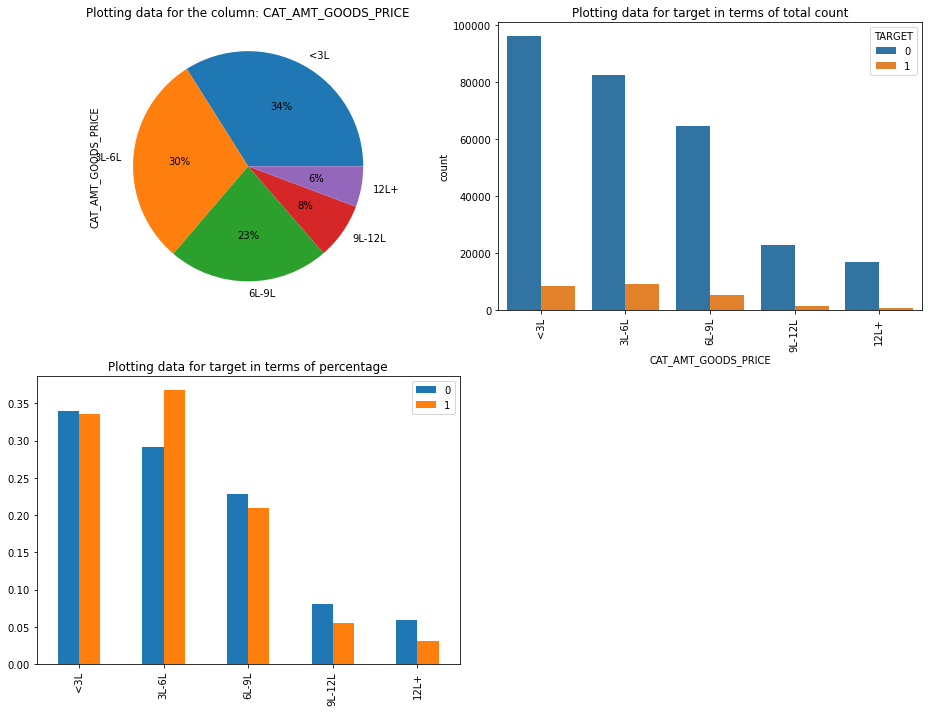

Plotting CAT_AMT_CREDIT


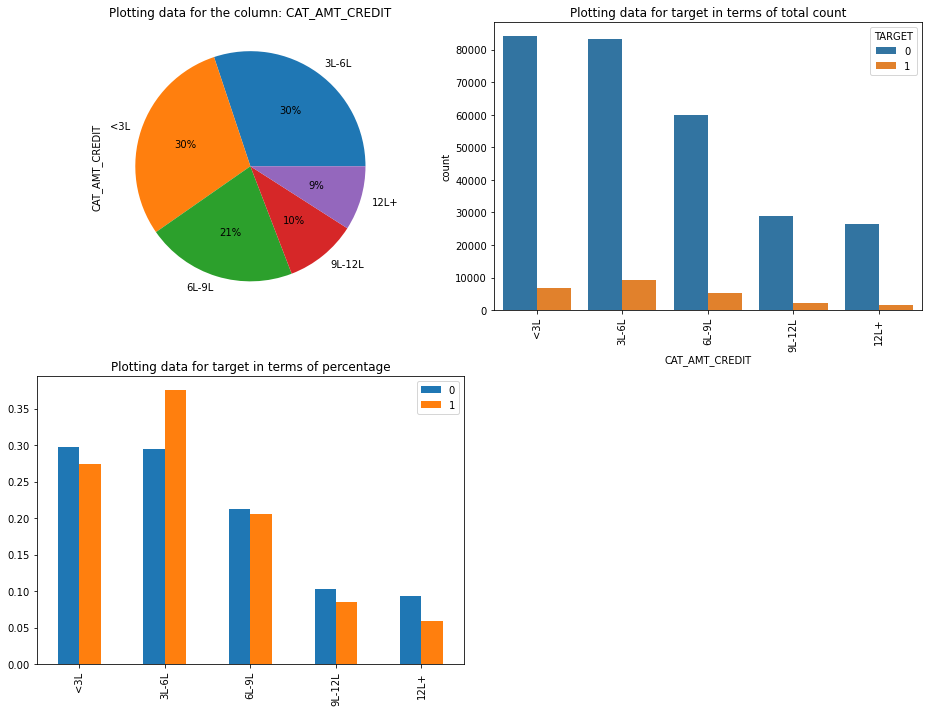

Plotting NAME_INCOME_TYPE


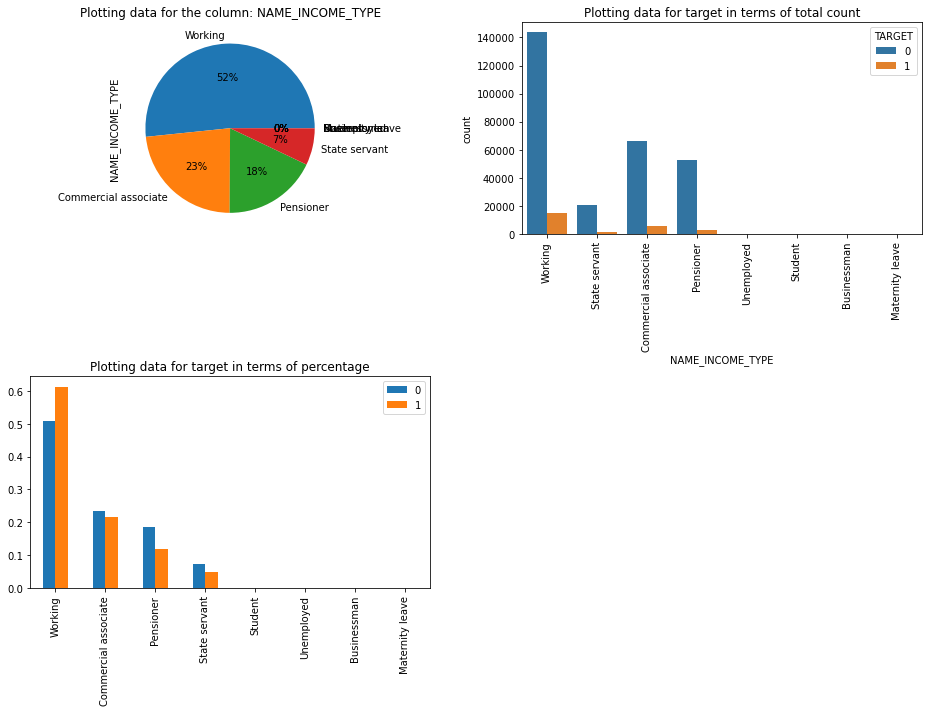

Plotting WEEKDAY_APPR_PROCESS_START


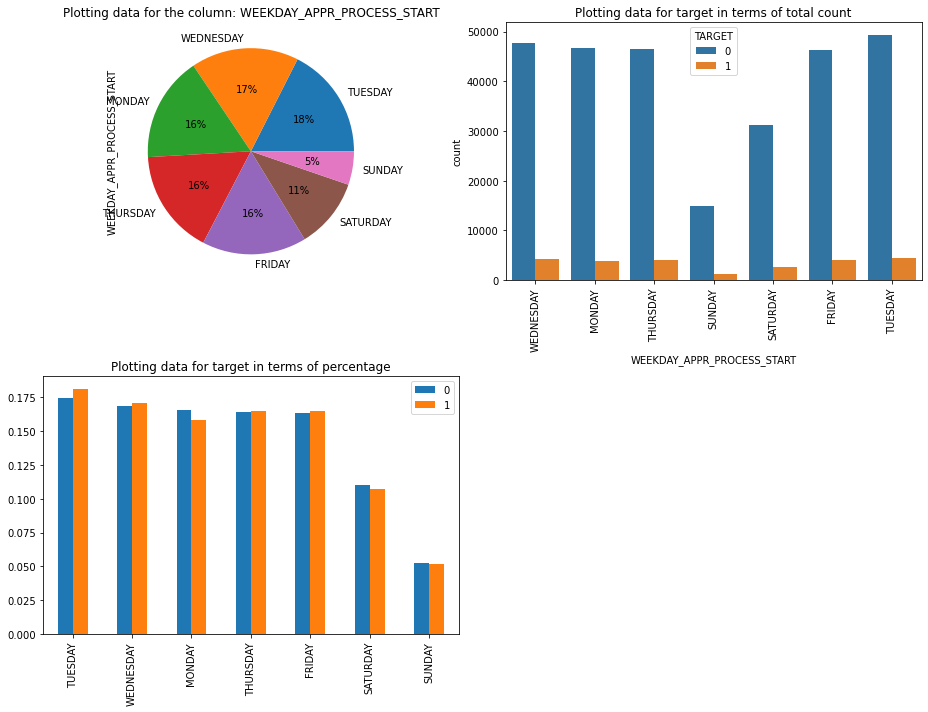

Plotting EMP_EXP_GROUP


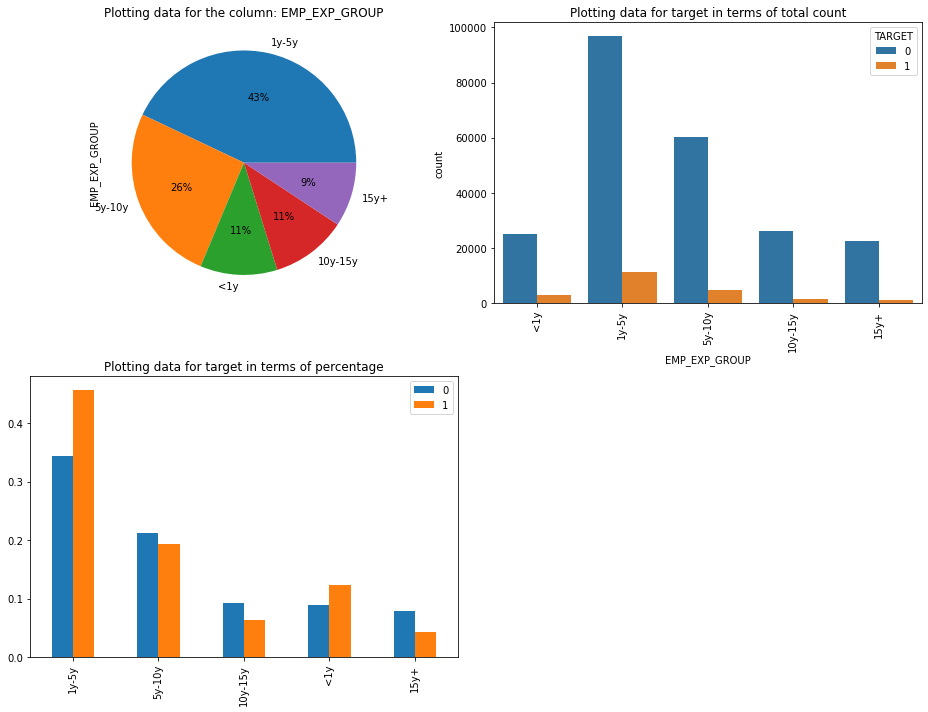

Plotting ORGANIZATION_TYPE


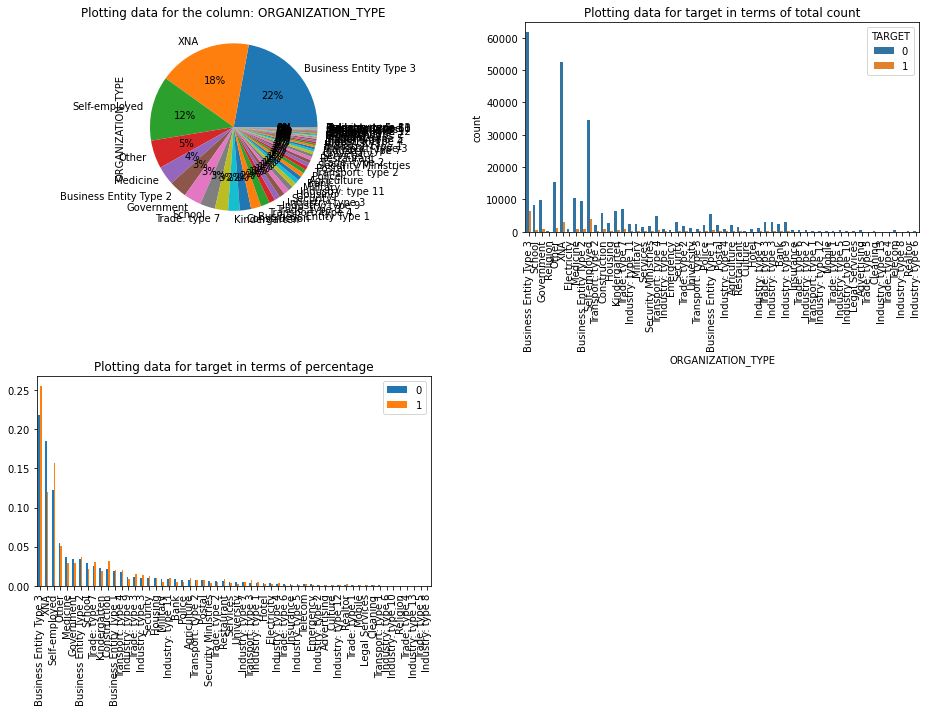

Plotting CODE_GENDER


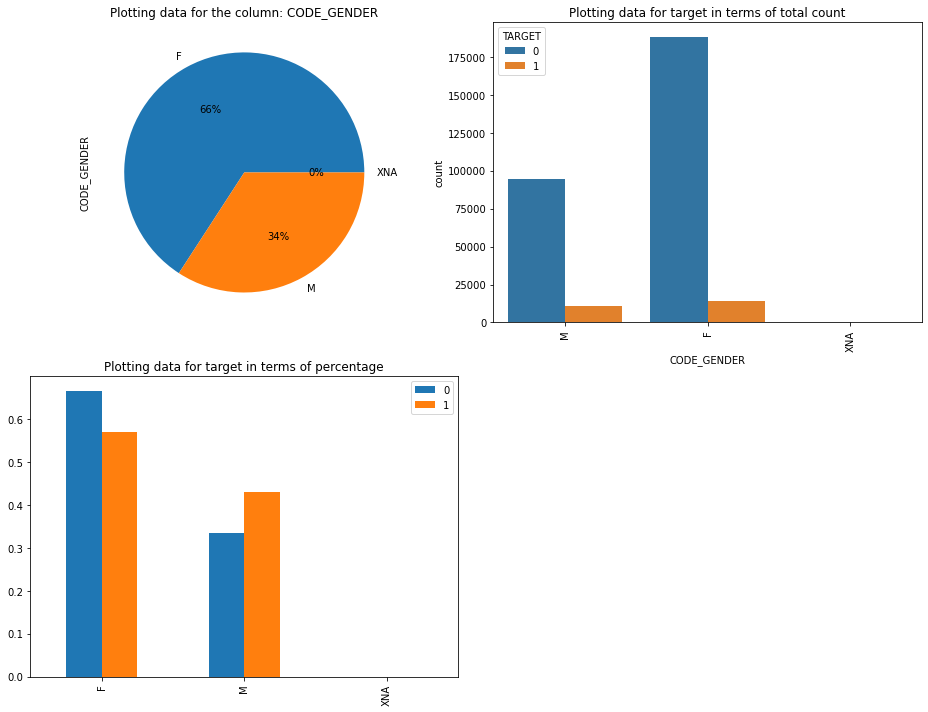

Plotting NAME_EDUCATION_TYPE


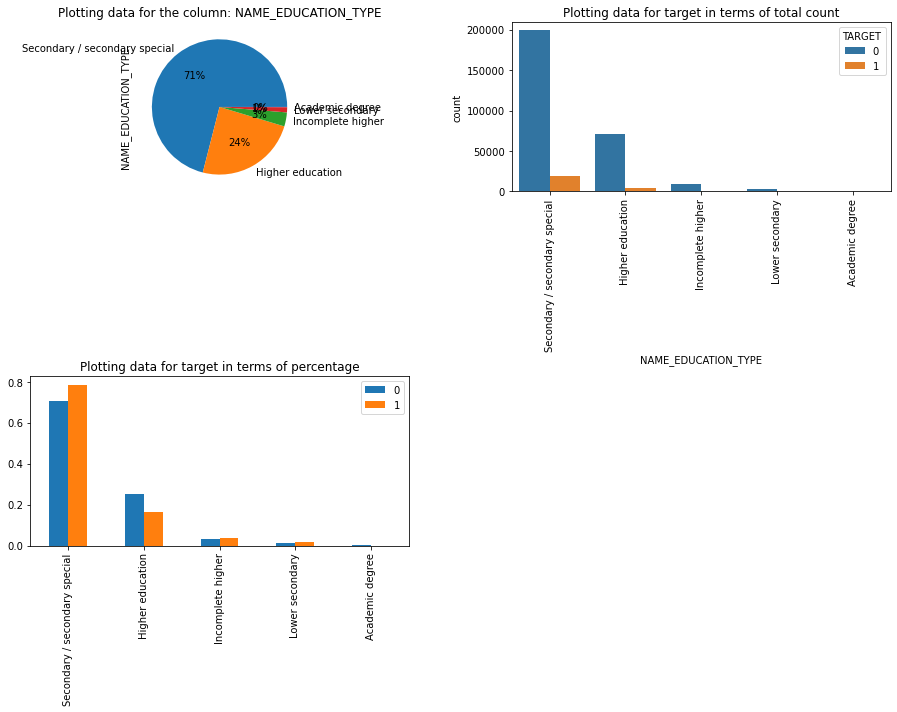

Plotting NAME_TYPE_SUITE


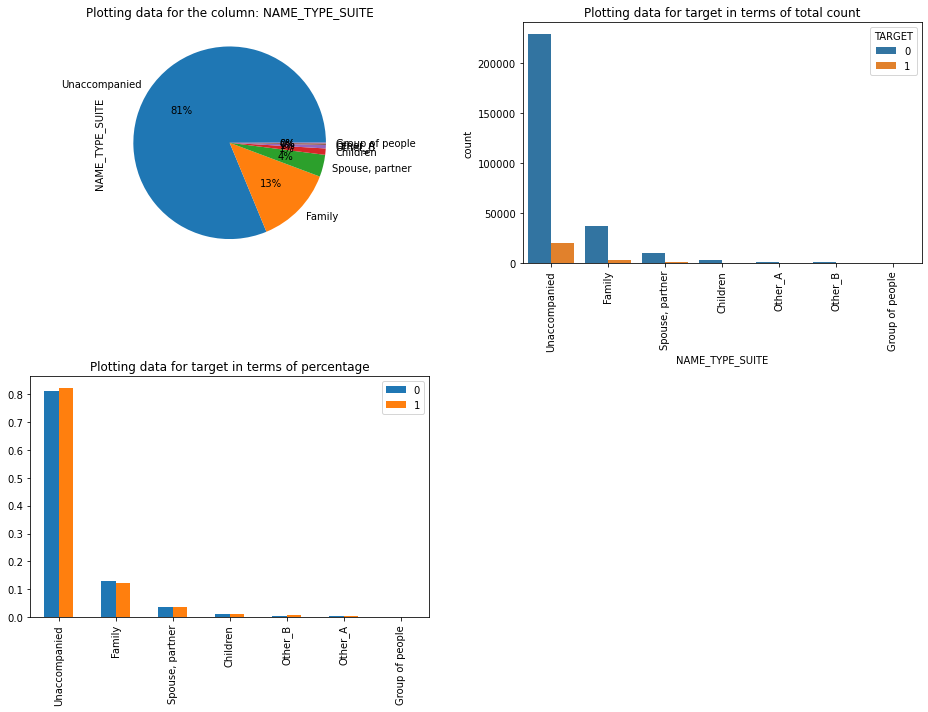

Plotting NAME_CONTRACT_TYPE


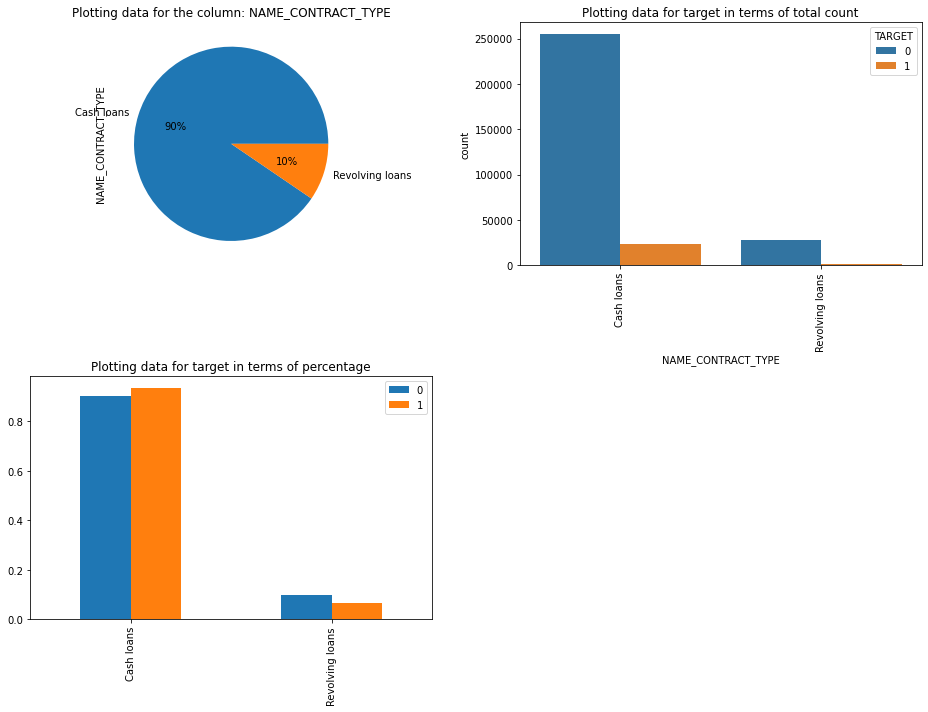

Plotting EMERGENCYSTATE_MODE


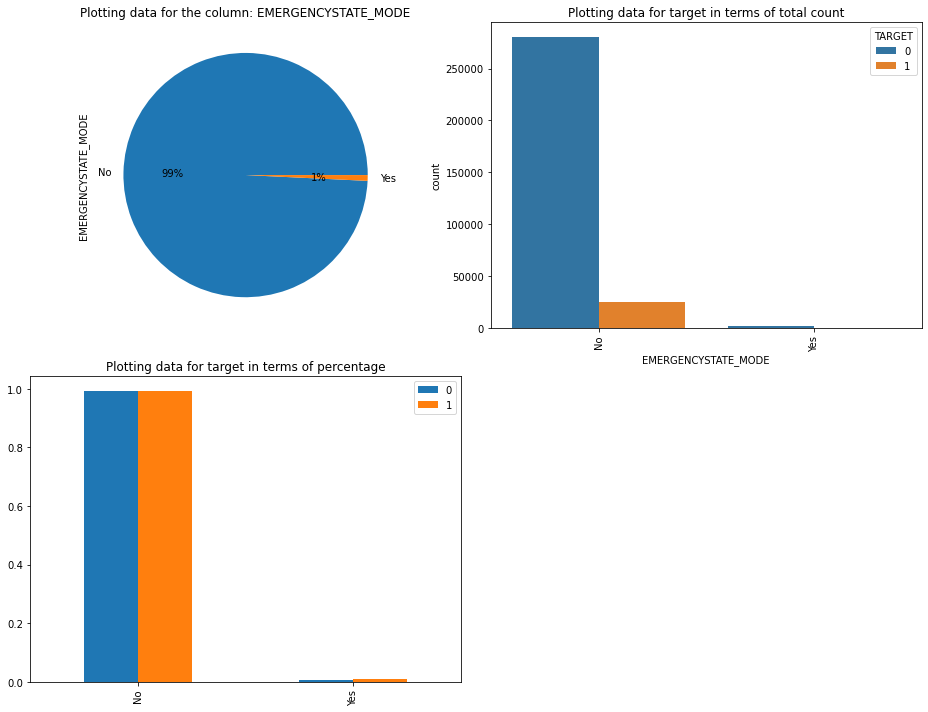

Plotting FLAG_OWN_CAR


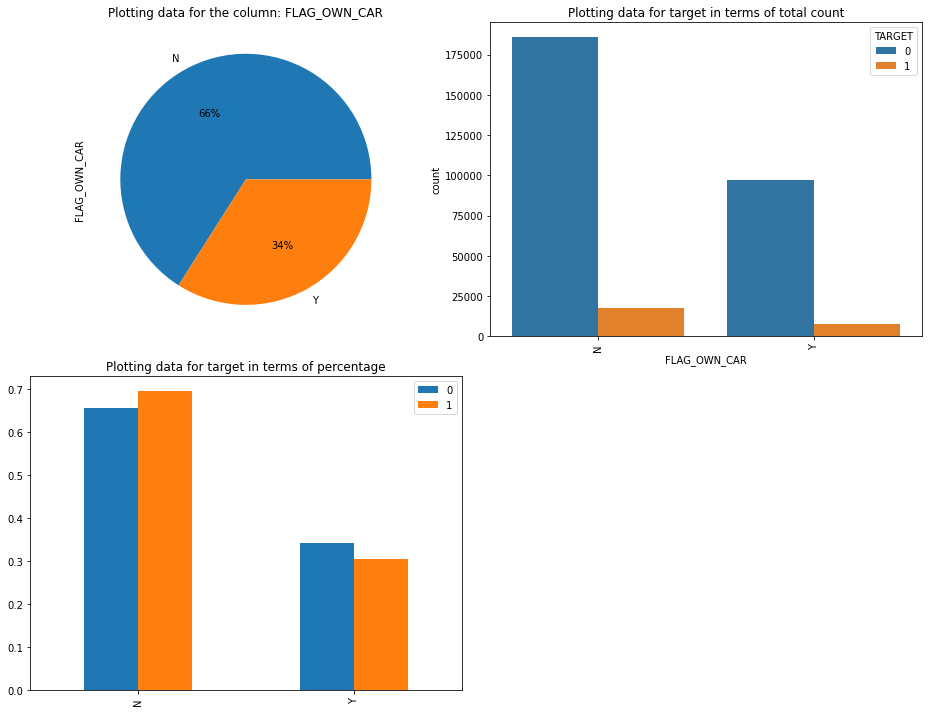

Plotting CAT_AMT_INCOME_TOTAL


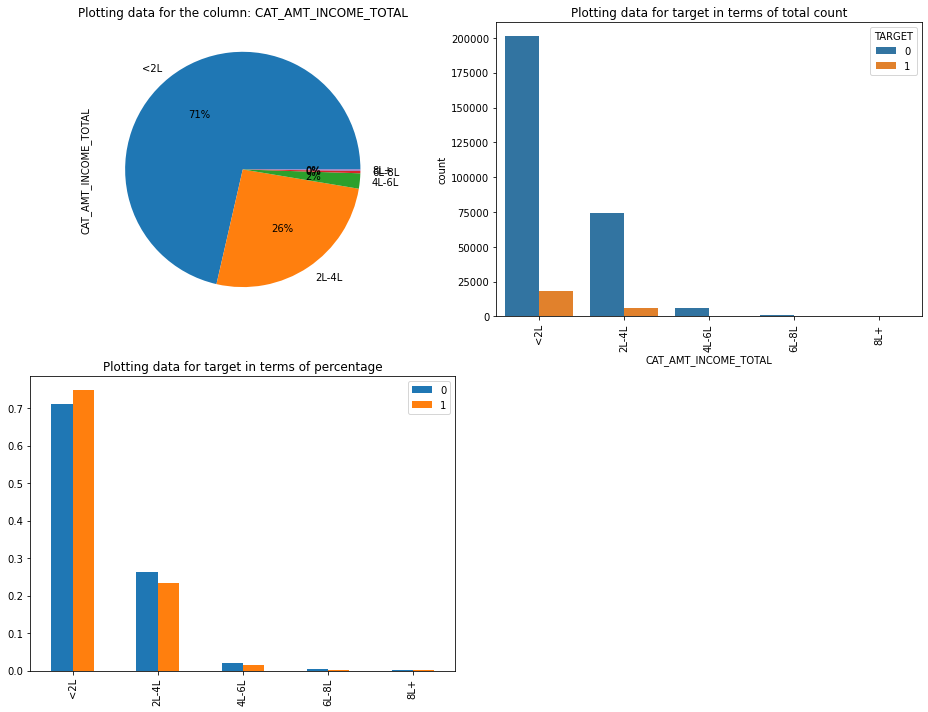

Plotting FLAG_OWN_REALTY


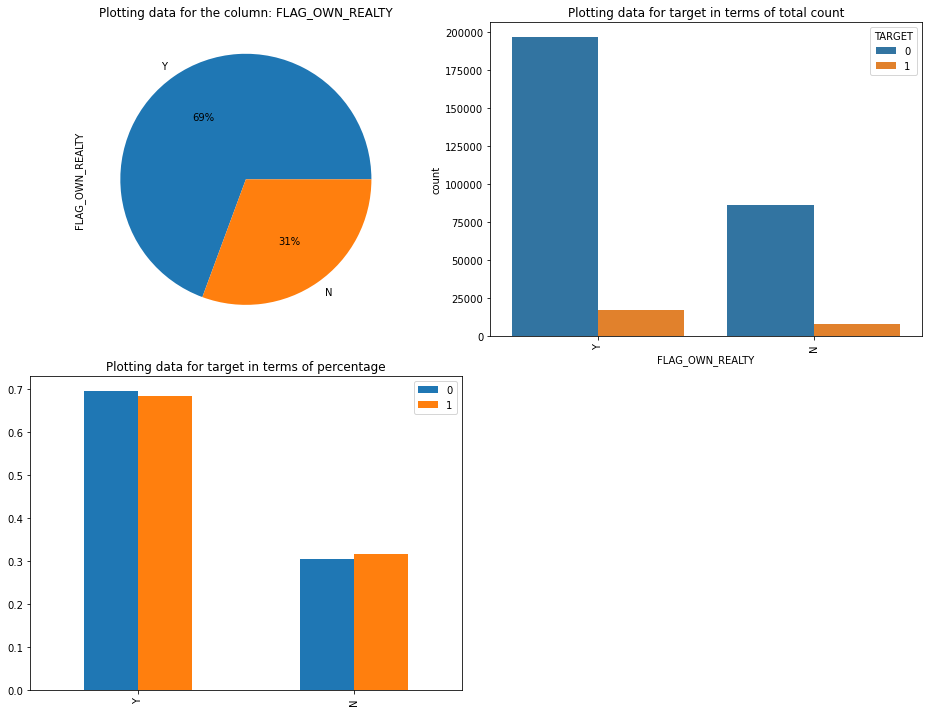

Plotting CAT_AMT_ANNUITY


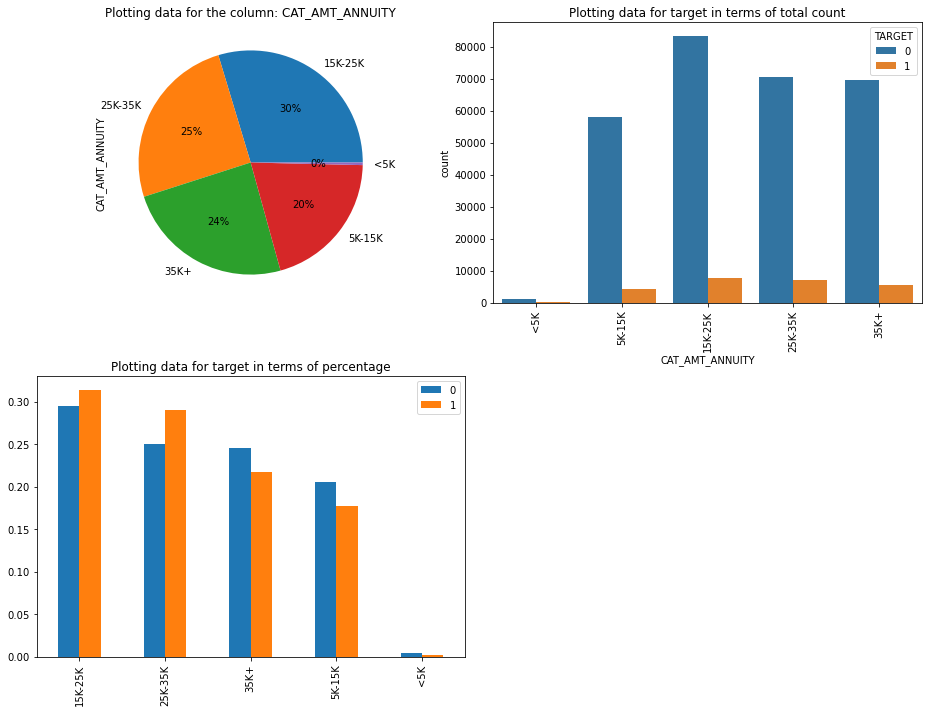

Plotting AGE_GROUPS


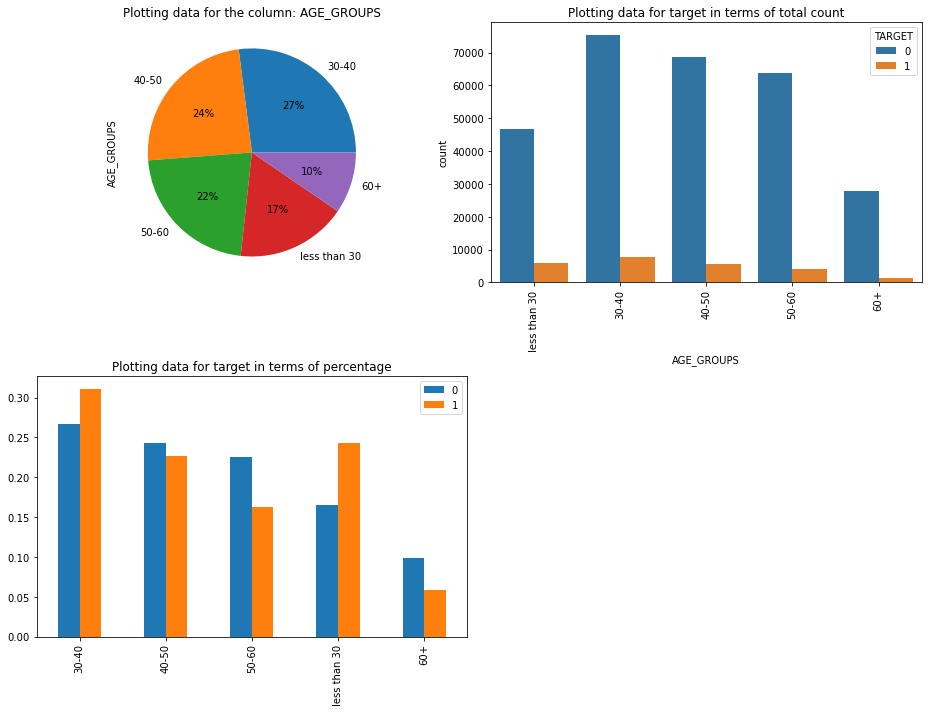

Plotting NAME_FAMILY_STATUS


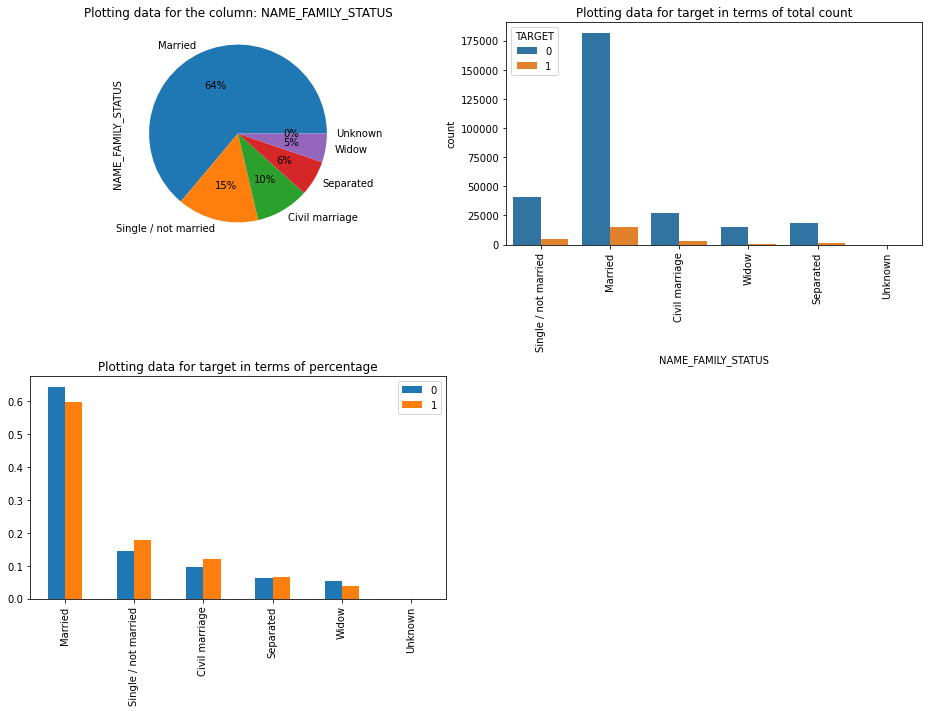

Plotting NAME_HOUSING_TYPE


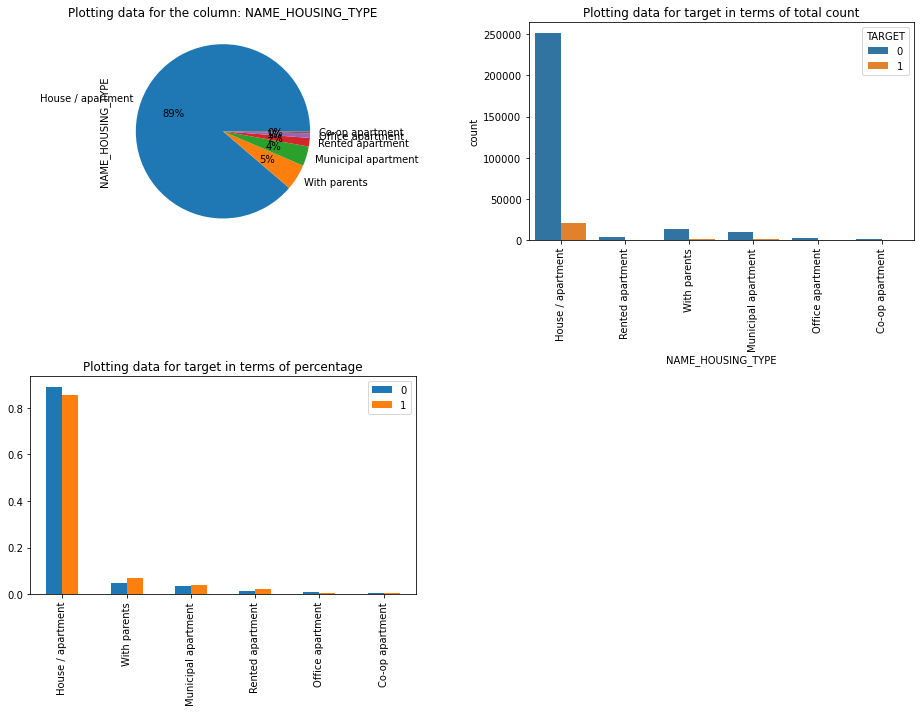

Plotting OCCUPATION_TYPE


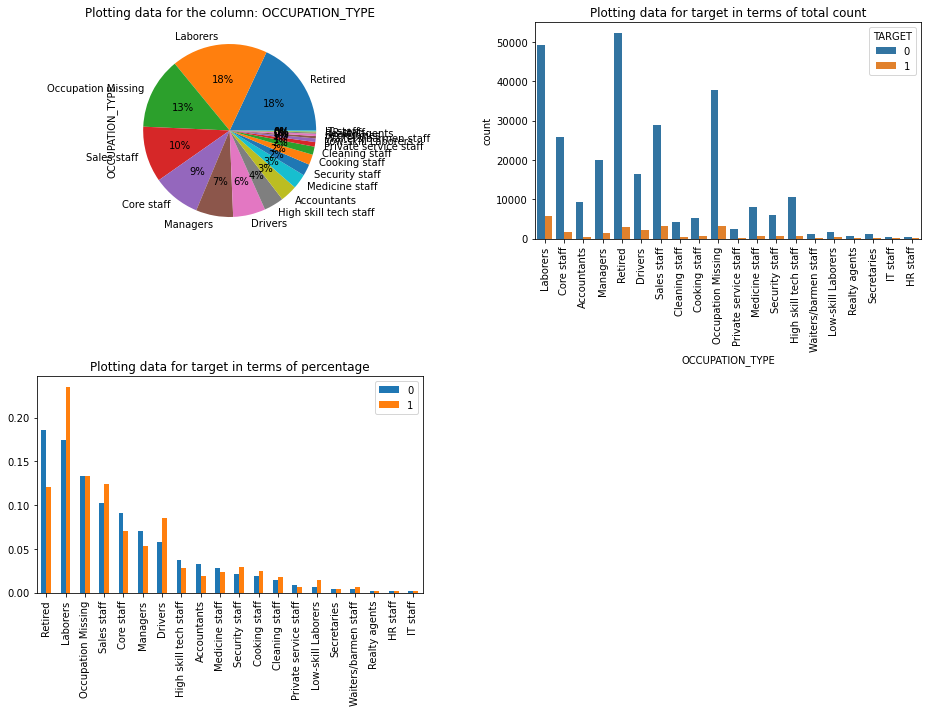

In [75]:
for column in catg_cols:
    print("Plotting",column)
    plotting(inp1, train_0, train_1, column)
    print("="*70)

In [76]:
# Observations
# Clients with <3L and 3L-6L AMT_CREDIT are more likely to default than other with majority of clients with paytment difficulties in 3L-6L category
# Clients with <3L and 3L-6L AMT_GOODS_PRICE are more likely to default than other with majority of clients with paytment difficulties in 3L-6L category
# Majority of clients applying for loan are either labourers or retired. labourers are likely to have payment difficulties
# Labourers are more likely to have payment difficuties as compared to others
# Most clients applied for loans on Tuesday followed by wednesday 
# Most clients applying for loan have experience between 1year to 5years with  majority of clients with paytment difficulties in 1y-5y category
# Clients with organization type business entity type 3 applied for majority of the loans
# Majority of the loans were applied by clients having education type secondary/ secondary special
# Majority of the loans are cash loans
# Majority of clients applying for loans were unaccompanied
# Majority of clients applying for loans do not own a car
# More Females apply for loans as compared to males
# Majority of clients have <2L total income
# Married clients are more likely to apply for a loan
# Majority of clients applying for loans lived in house/ apartments
# Majority of clients applying for loans owned realty
# Clients in the age groups less tha 30 are more likely to have payment difficulties

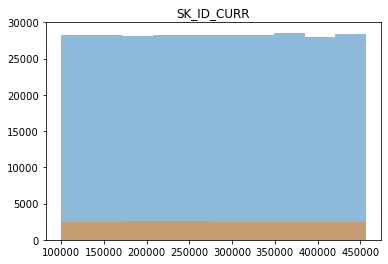

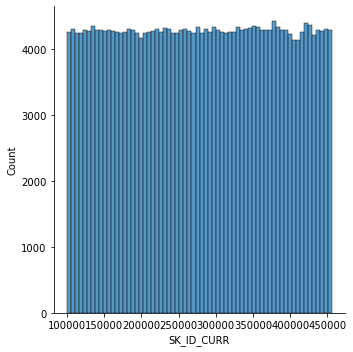

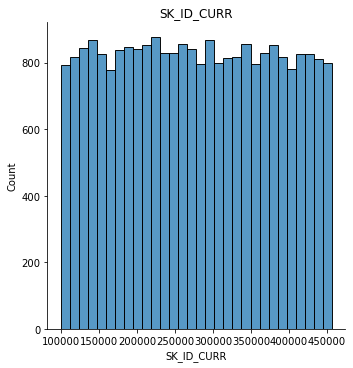

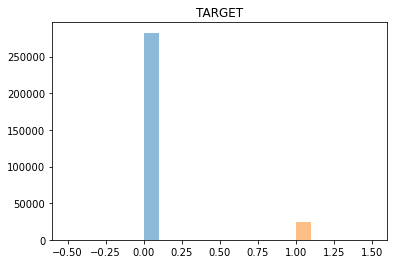

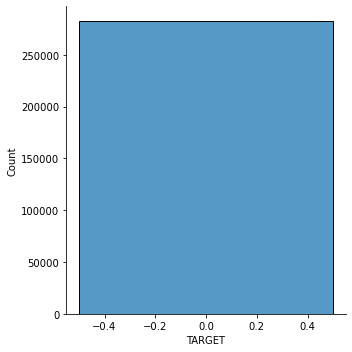

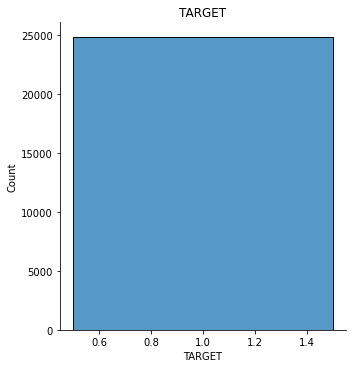

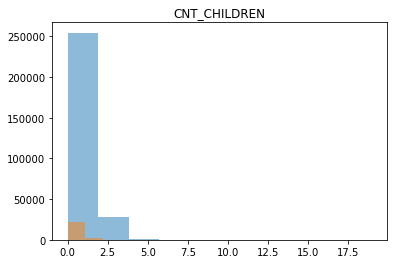

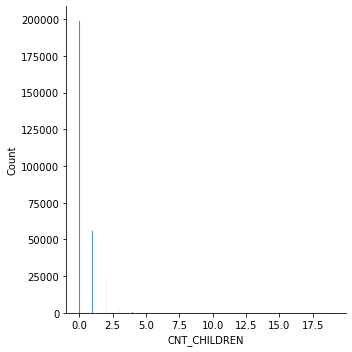

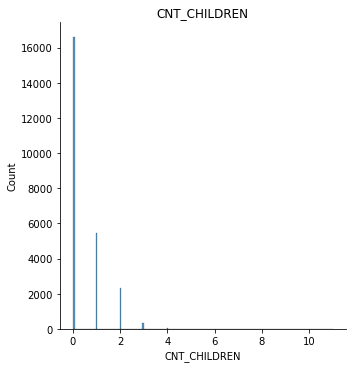

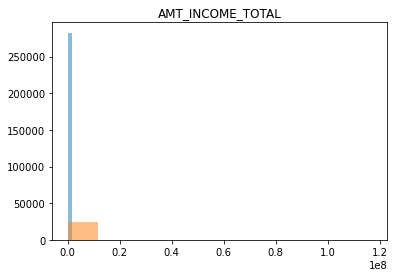

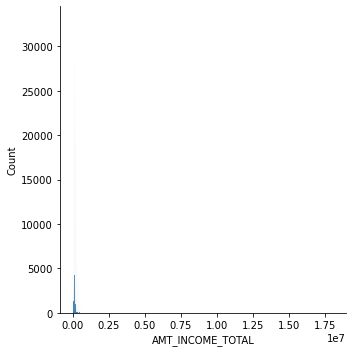

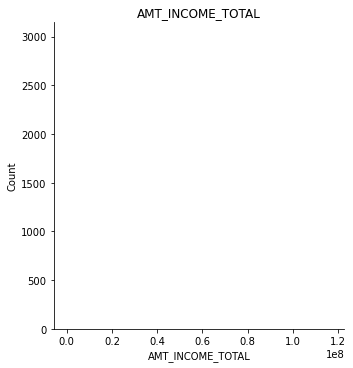

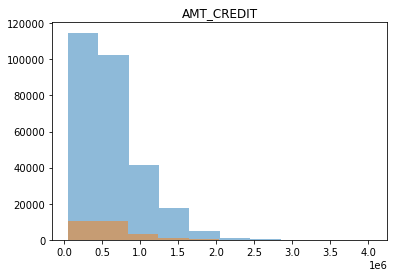

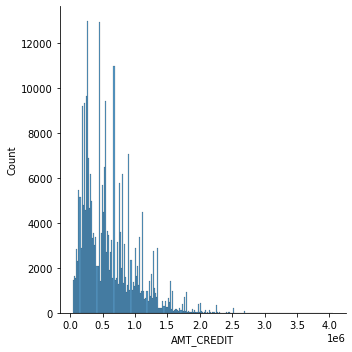

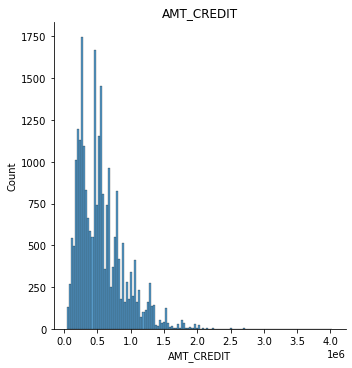

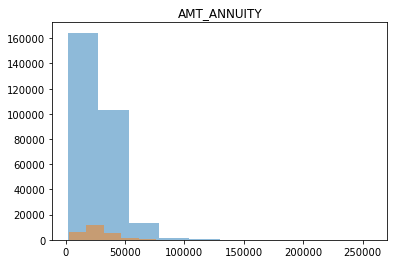

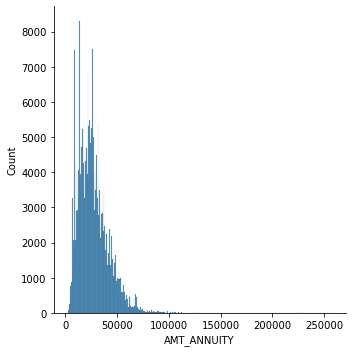

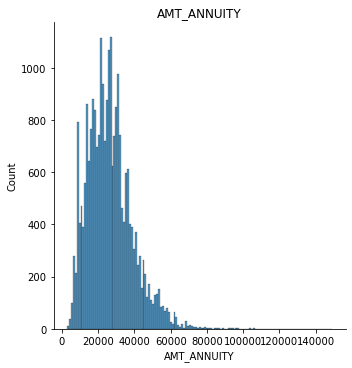

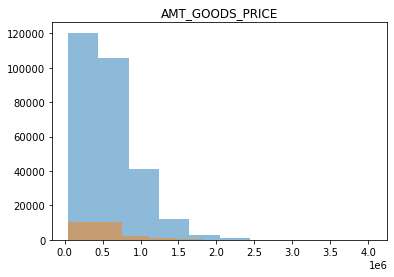

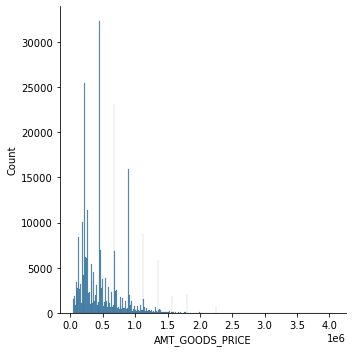

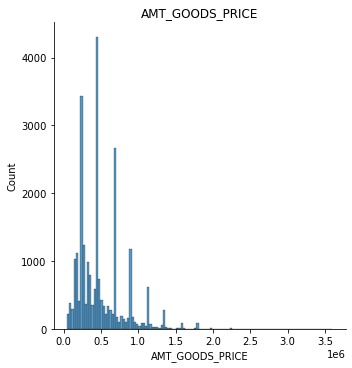

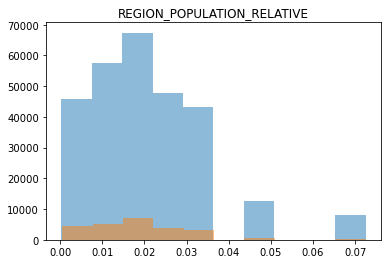

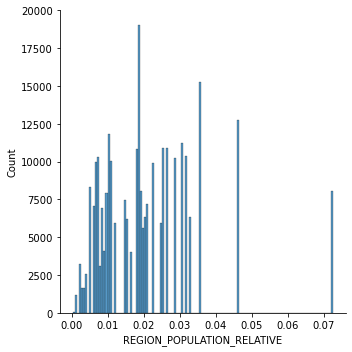

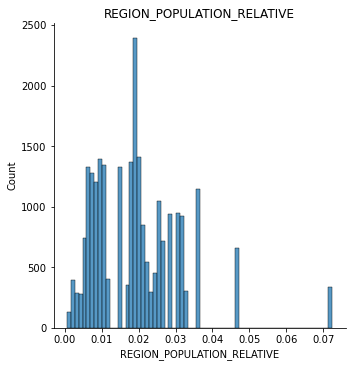

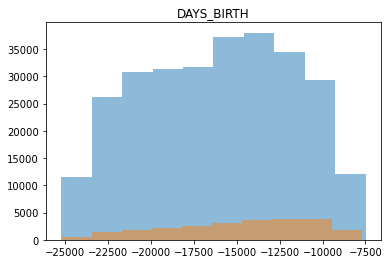

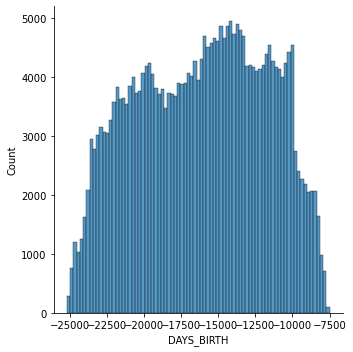

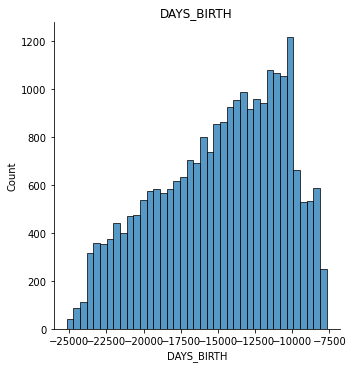

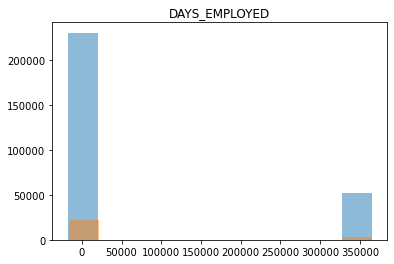

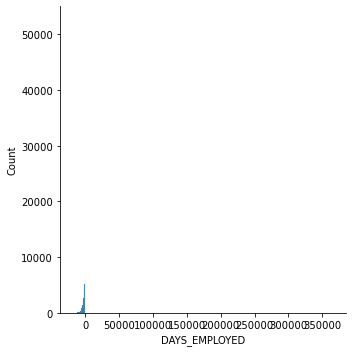

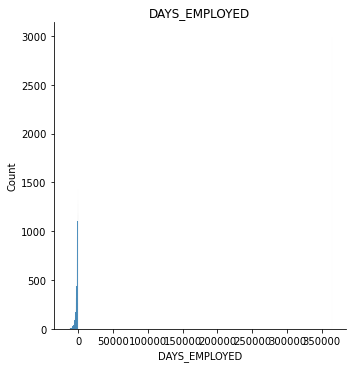

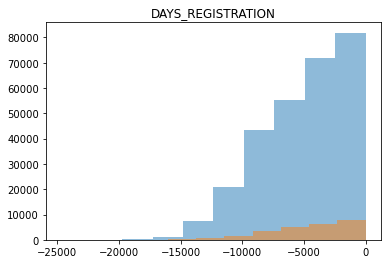

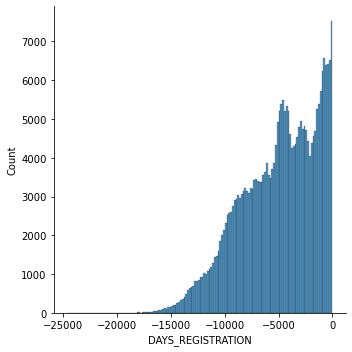

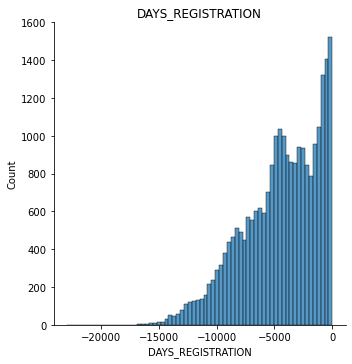

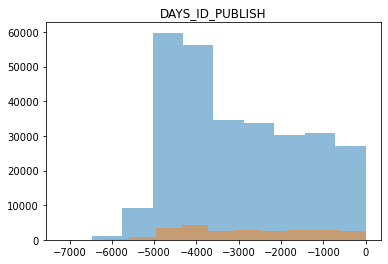

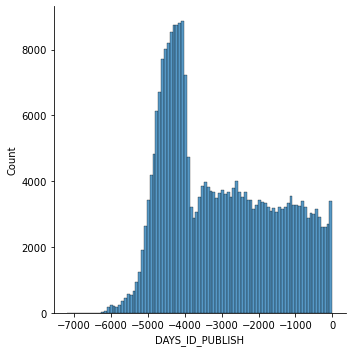

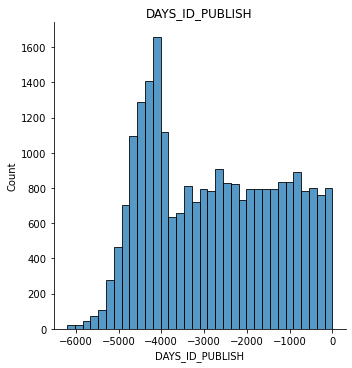

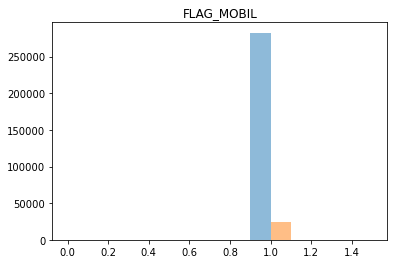

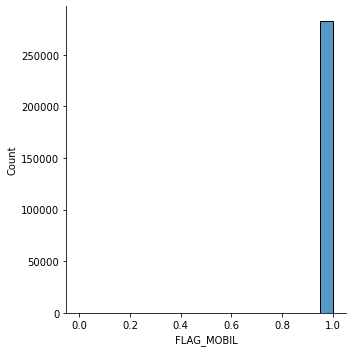

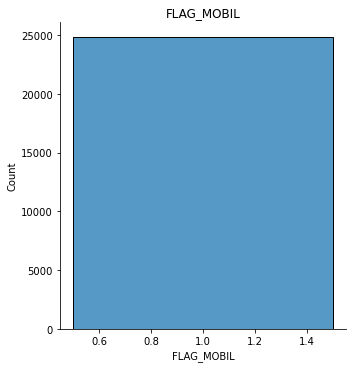

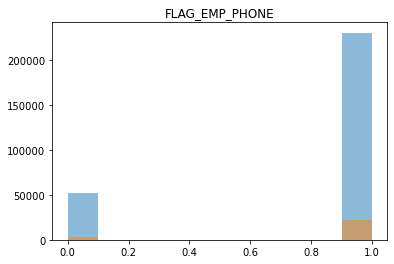

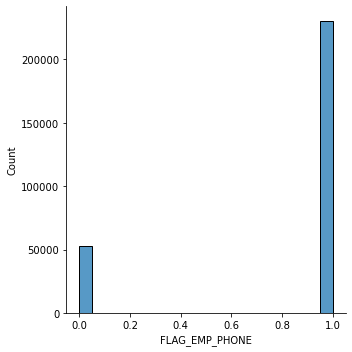

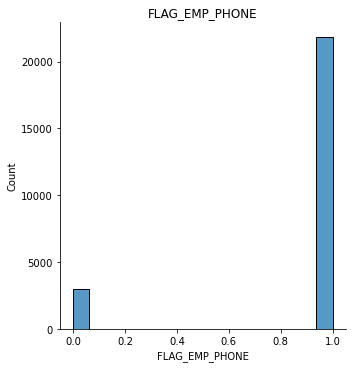

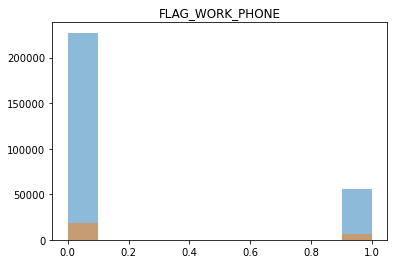

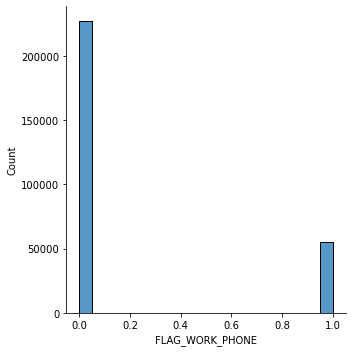

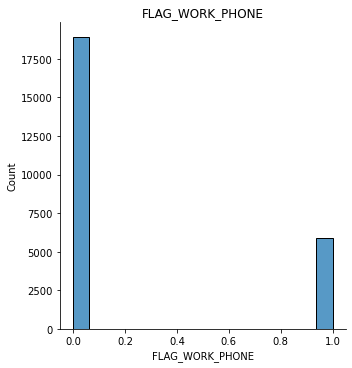

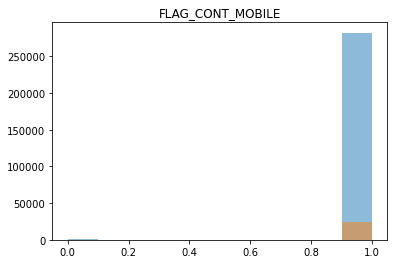

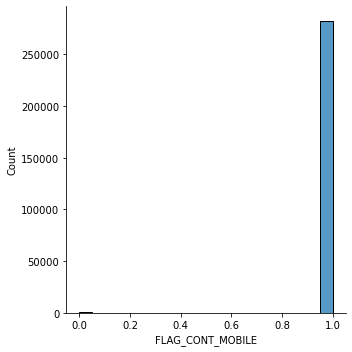

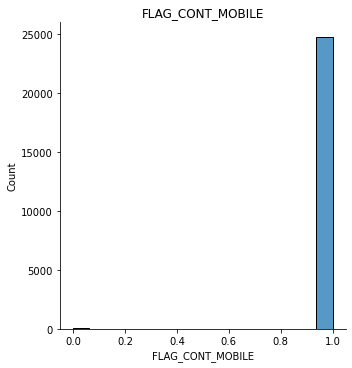

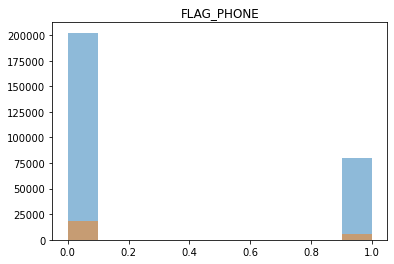

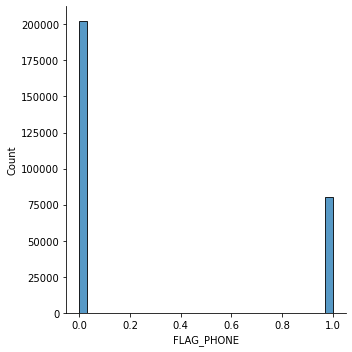

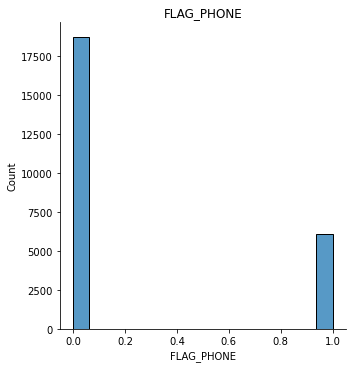

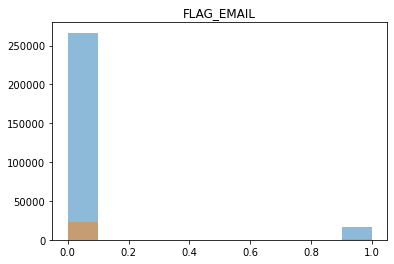

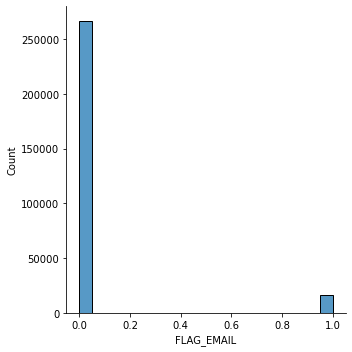

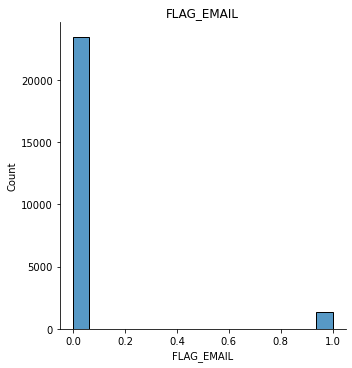

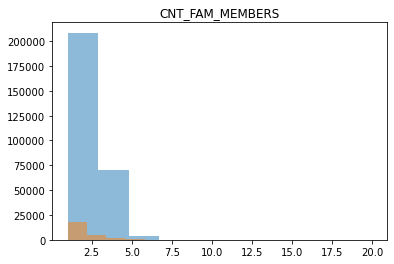

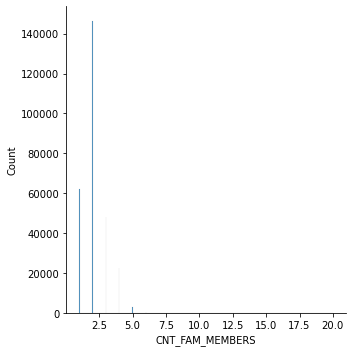

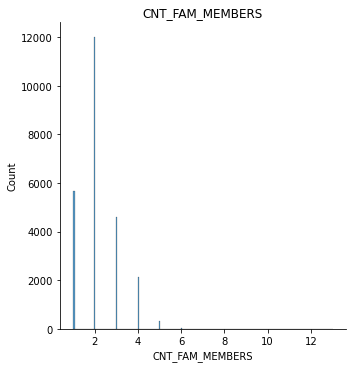

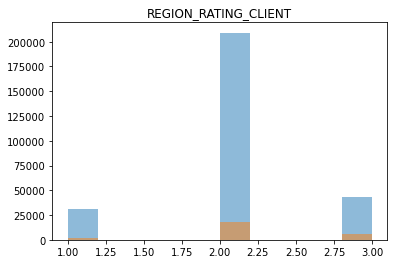

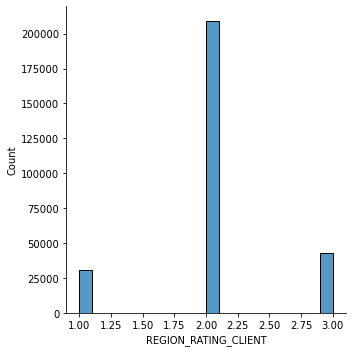

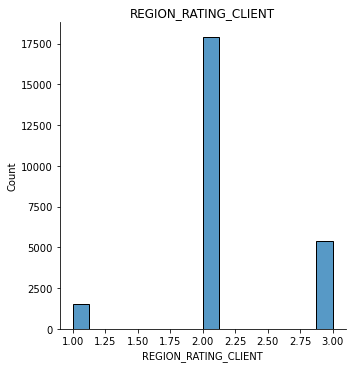

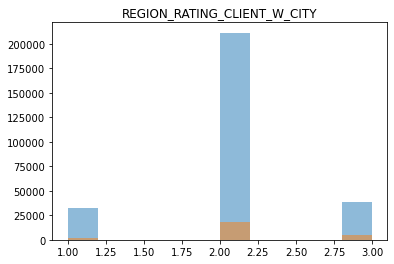

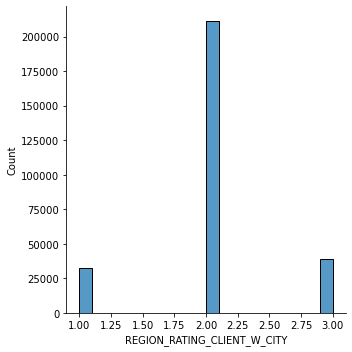

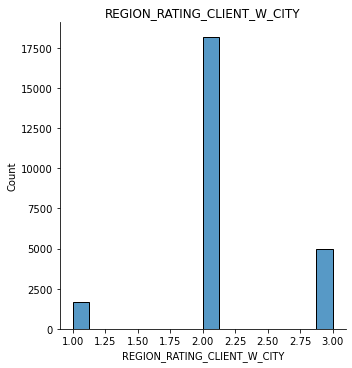

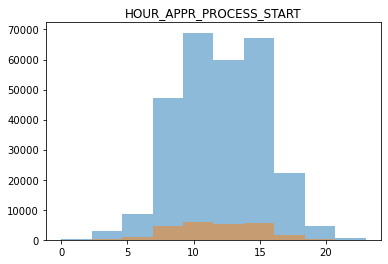

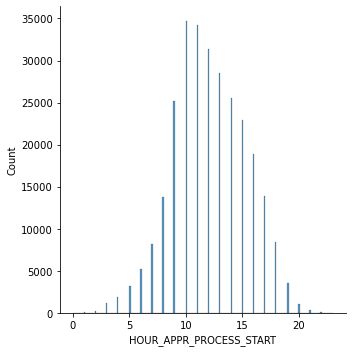

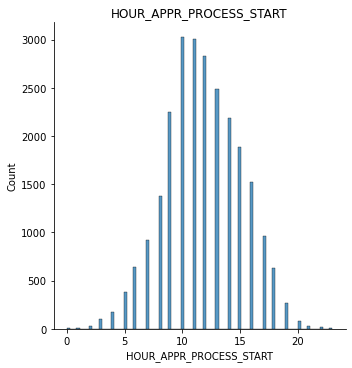

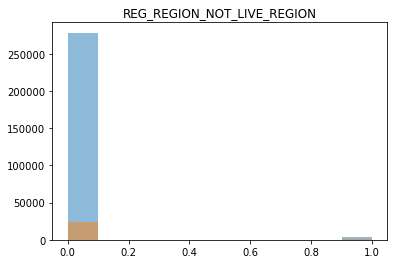

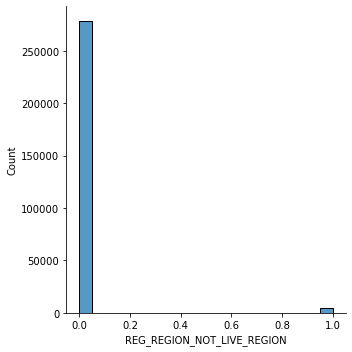

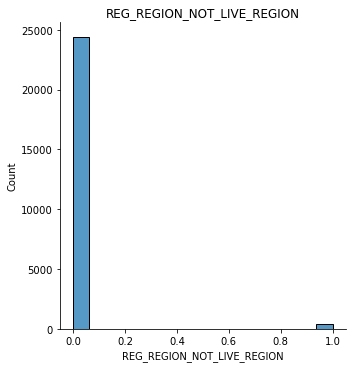

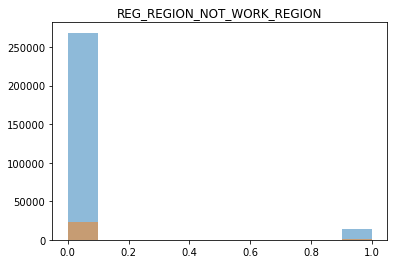

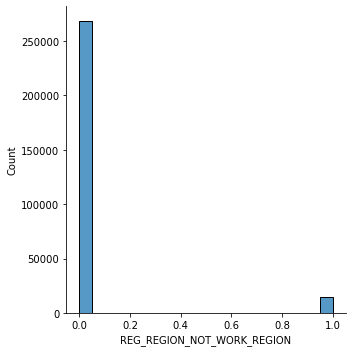

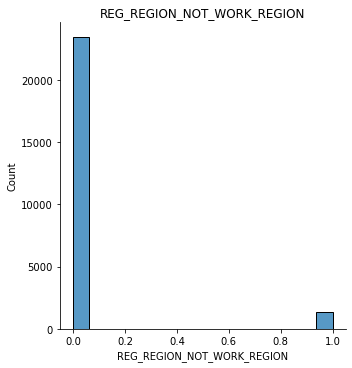

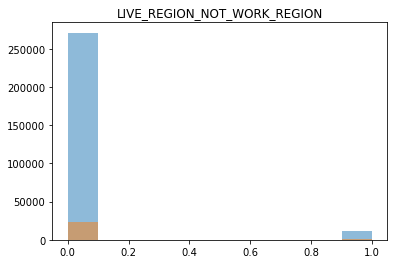

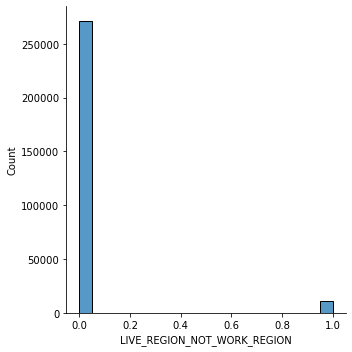

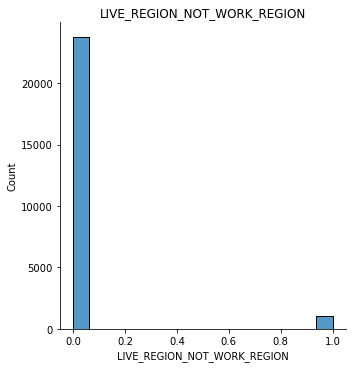

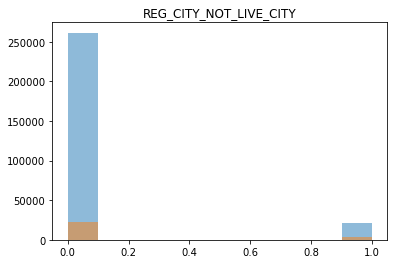

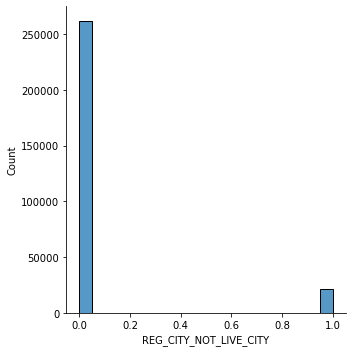

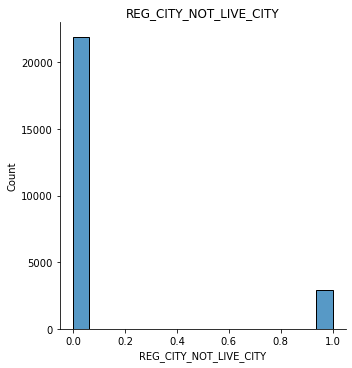

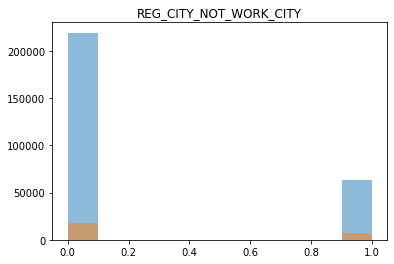

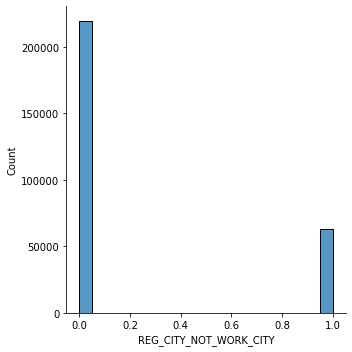

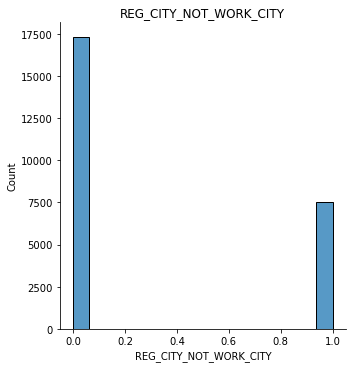

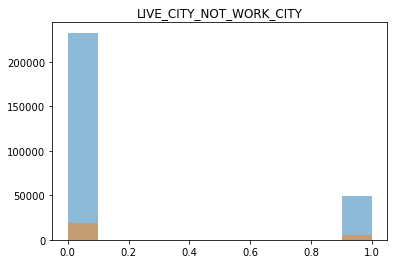

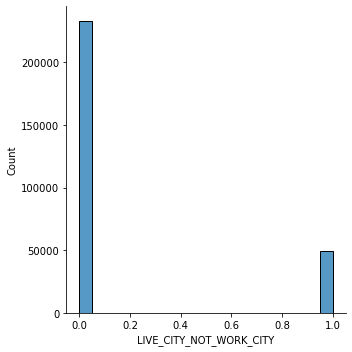

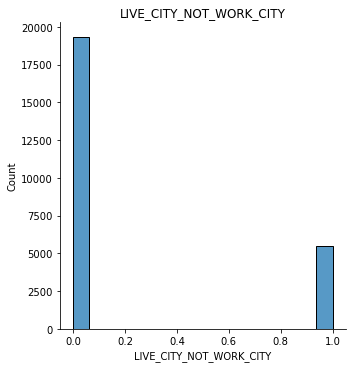

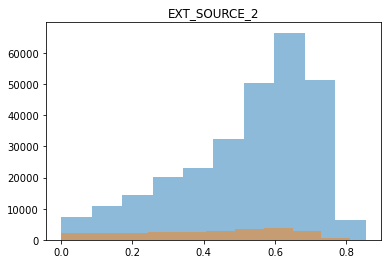

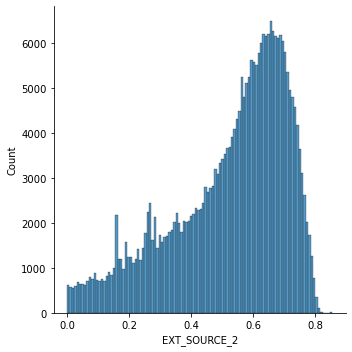

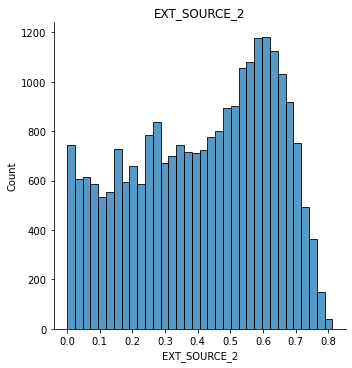

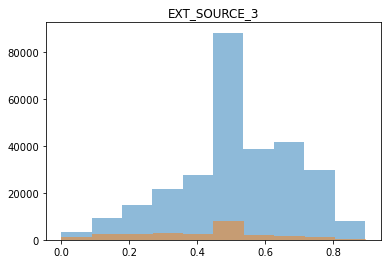

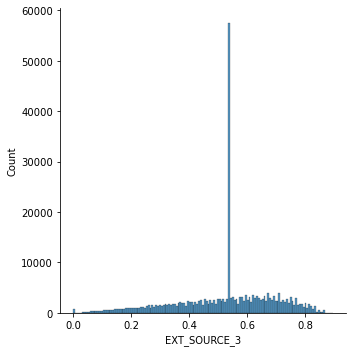

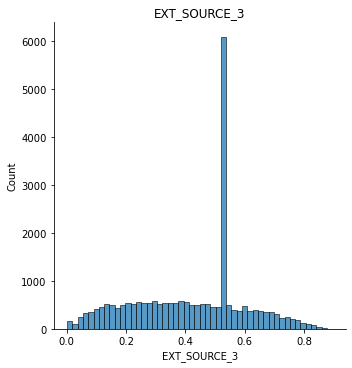

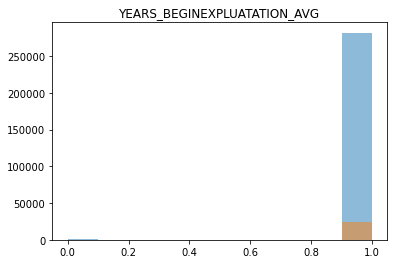

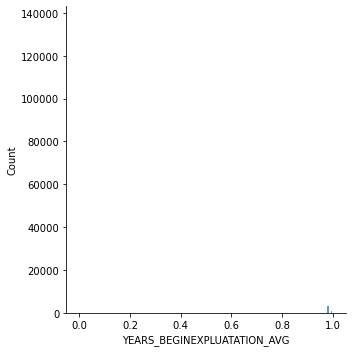

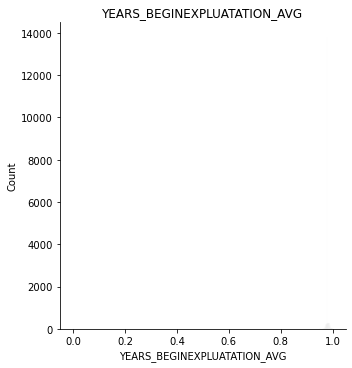

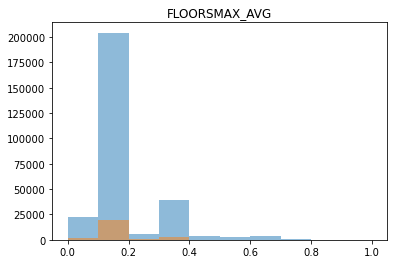

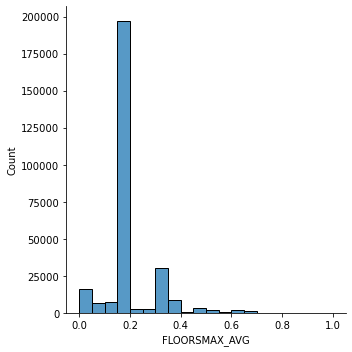

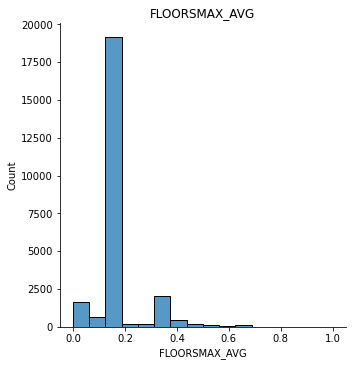

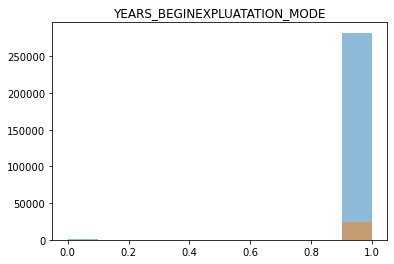

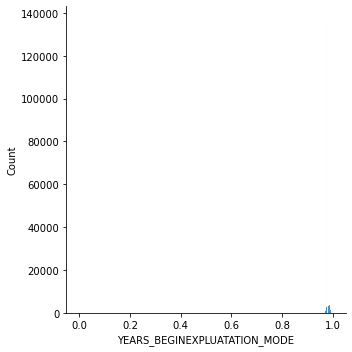

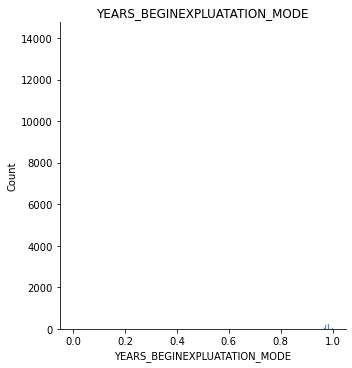

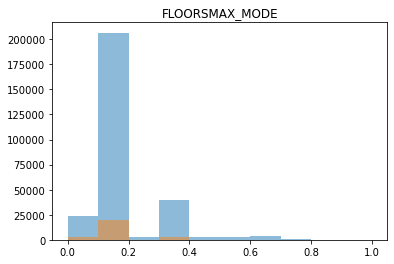

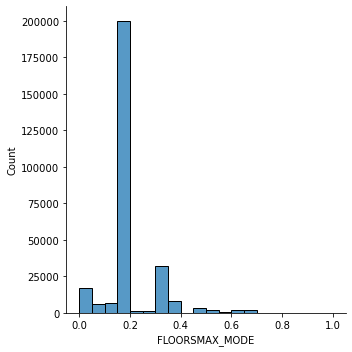

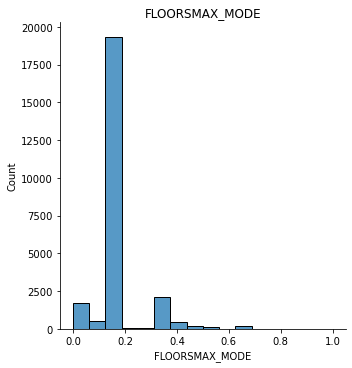

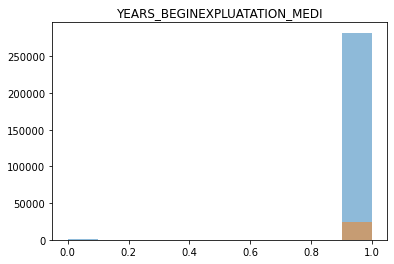

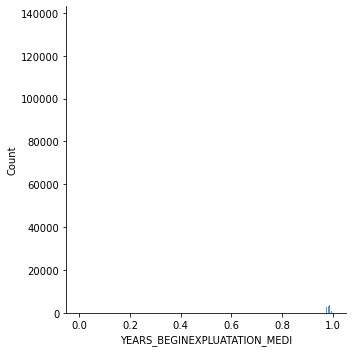

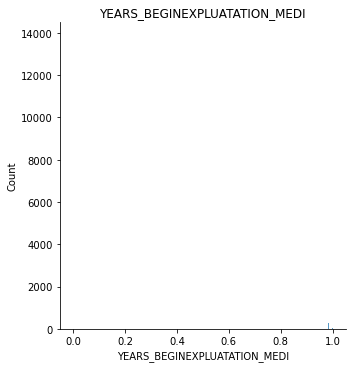

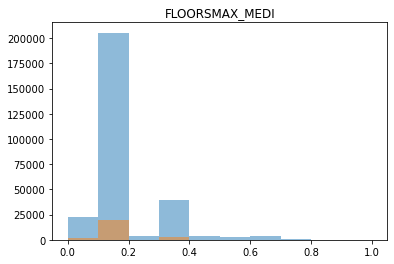

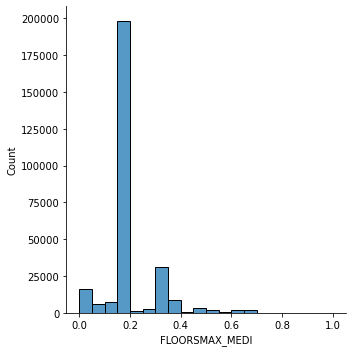

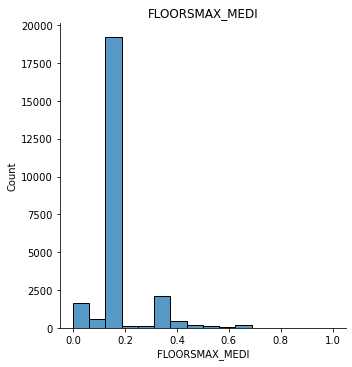

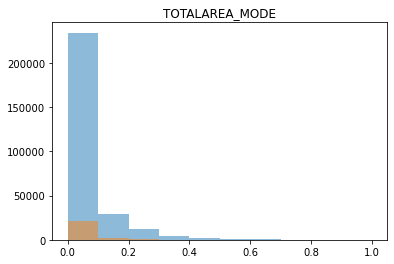

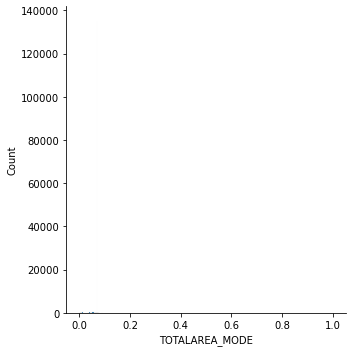

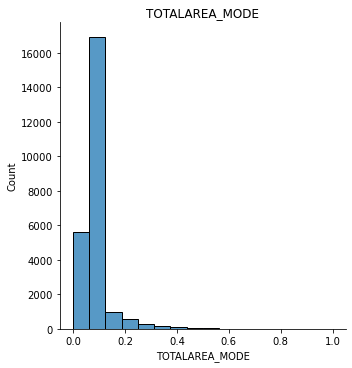

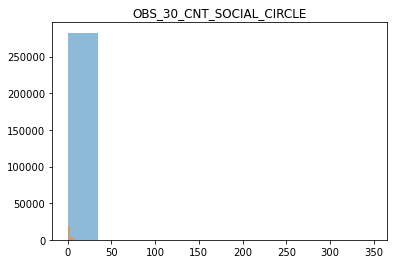

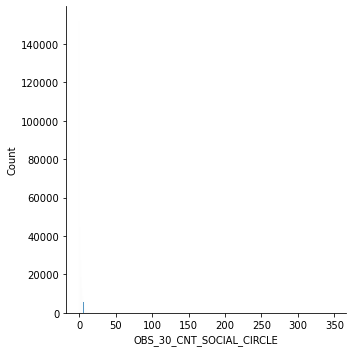

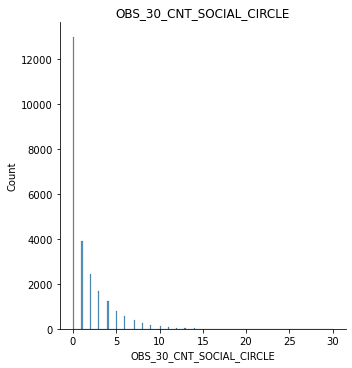

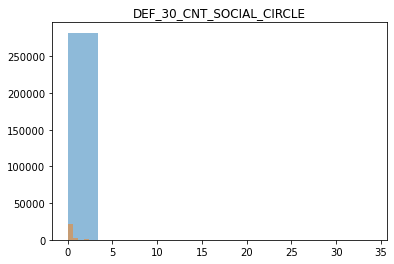

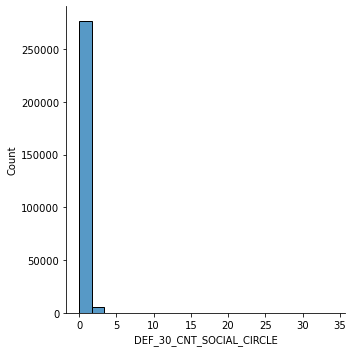

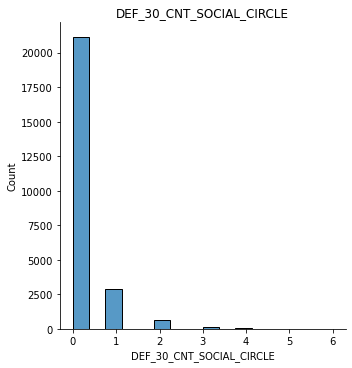

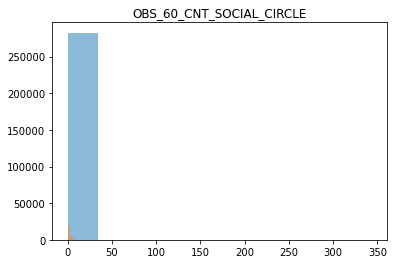

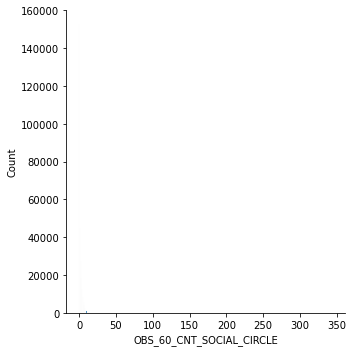

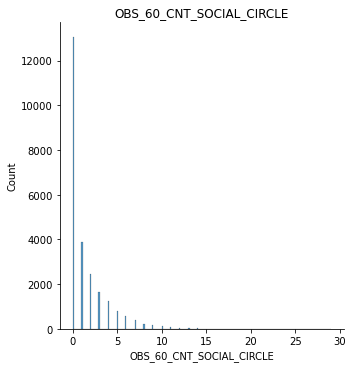

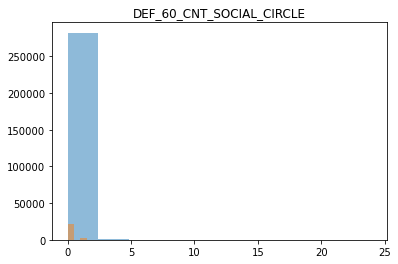

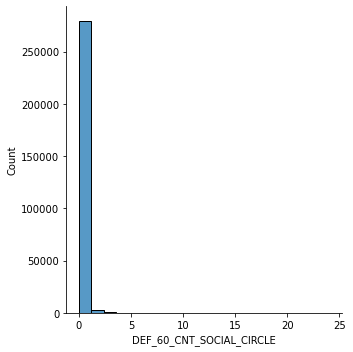

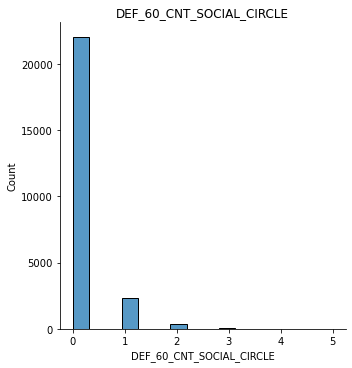

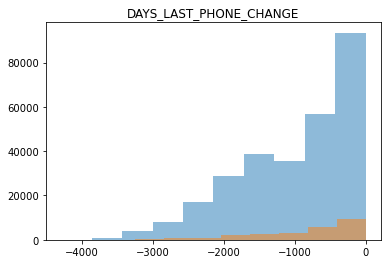

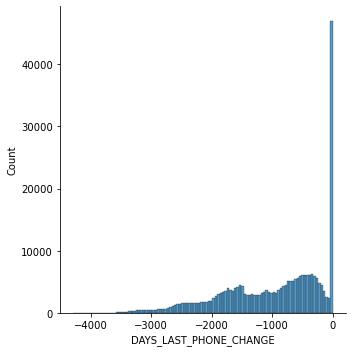

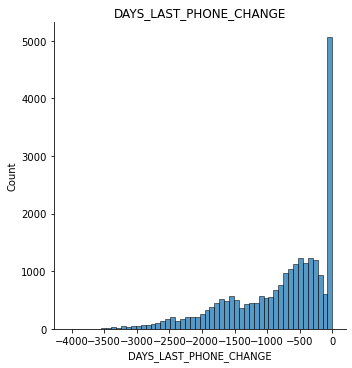

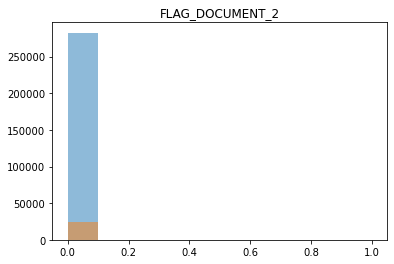

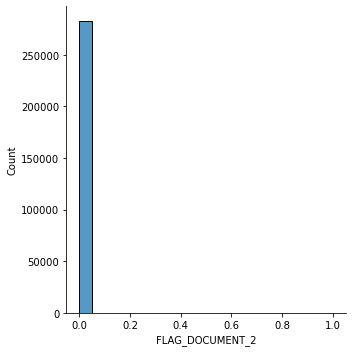

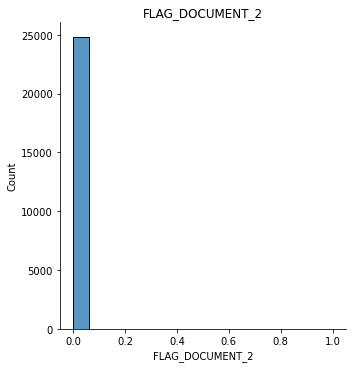

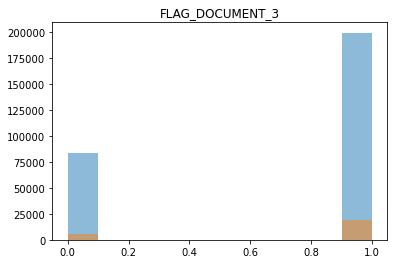

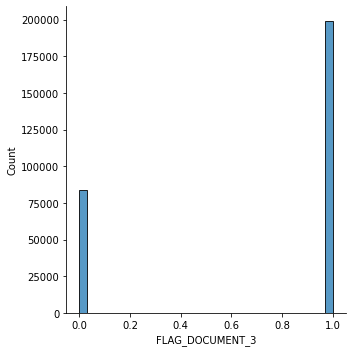

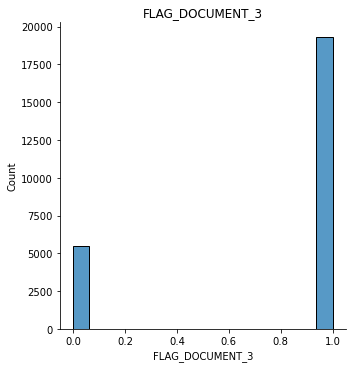

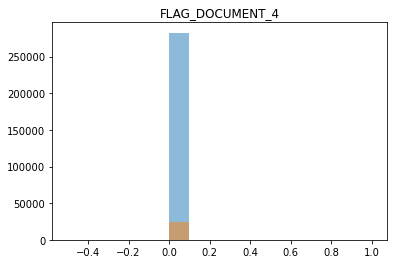

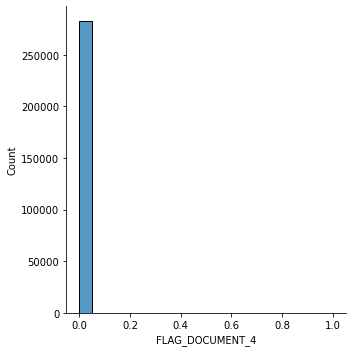

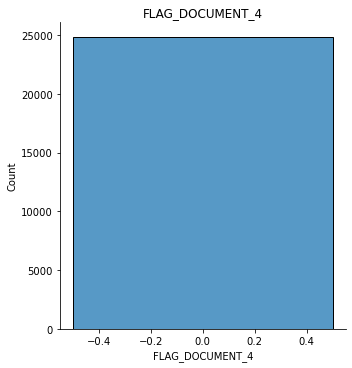

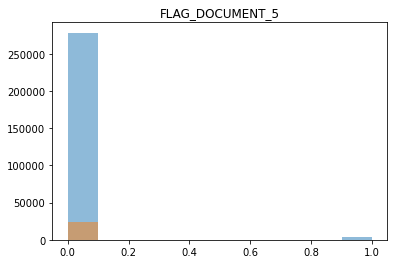

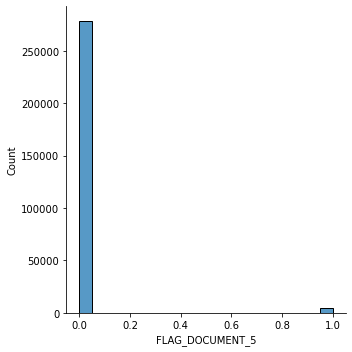

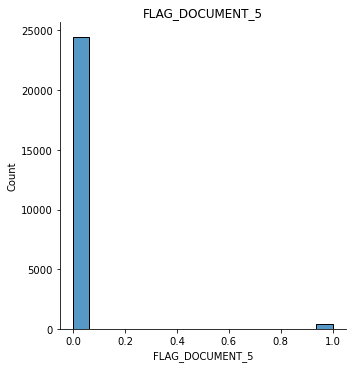

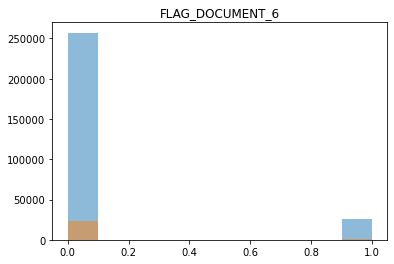

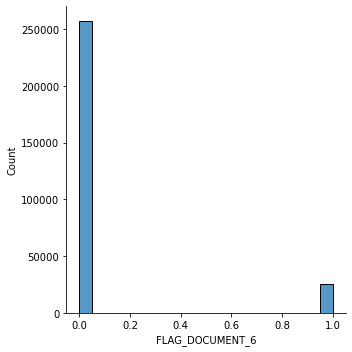

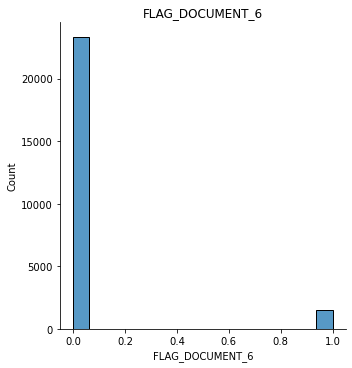

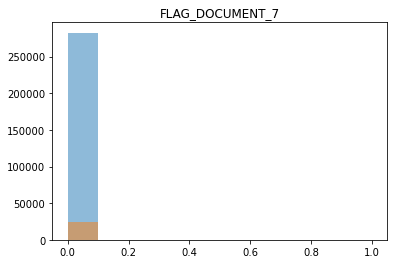

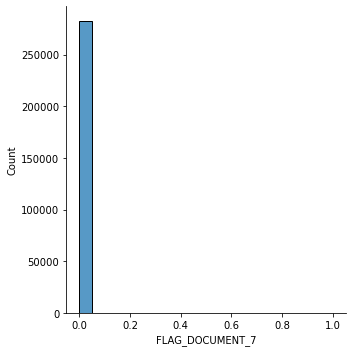

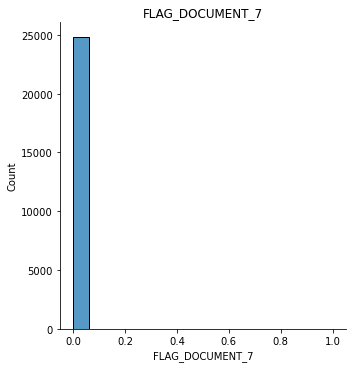

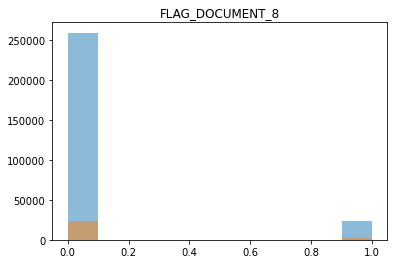

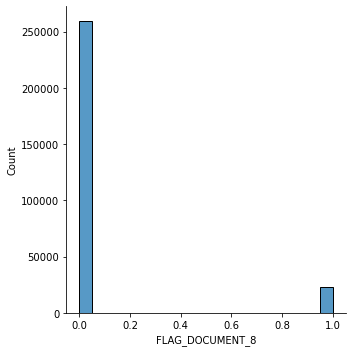

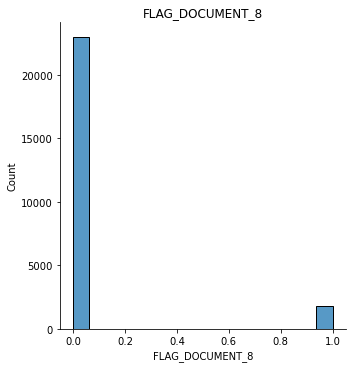

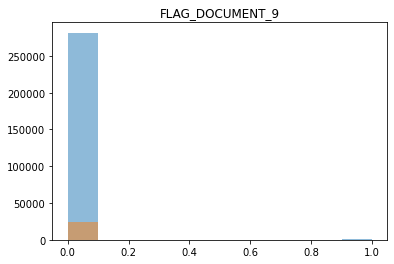

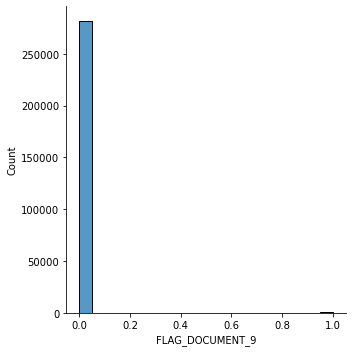

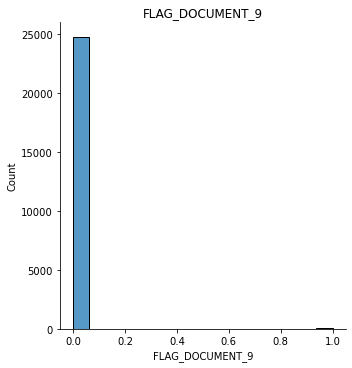

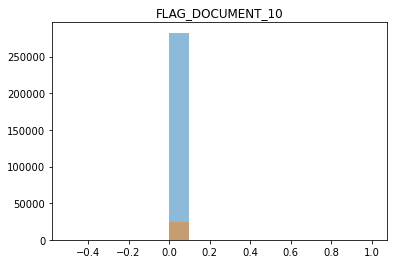

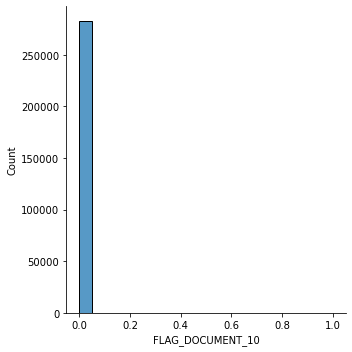

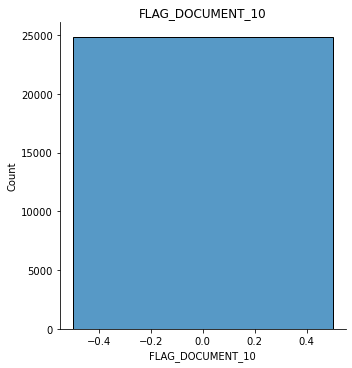

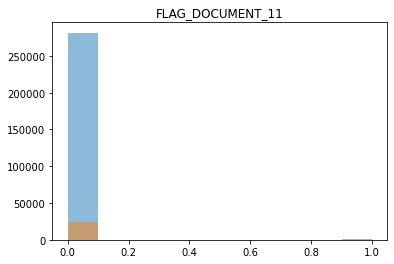

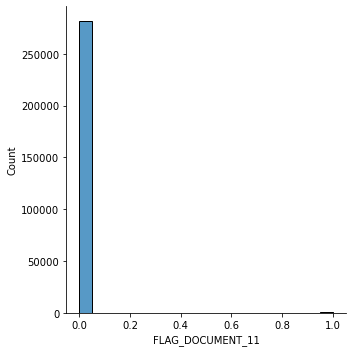

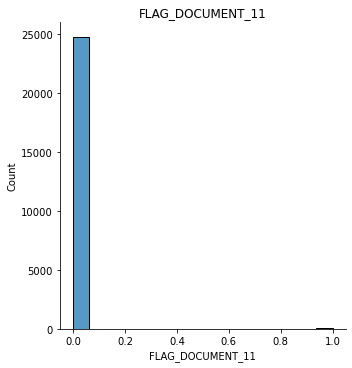

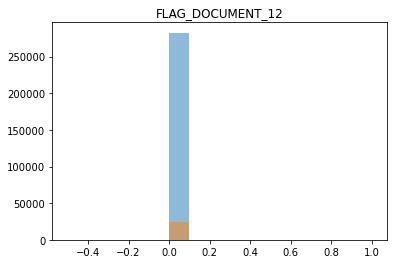

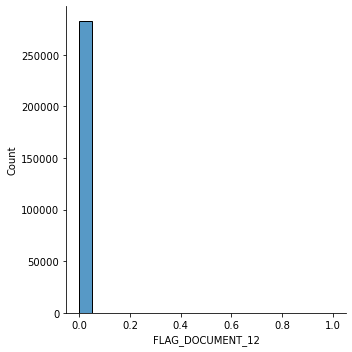

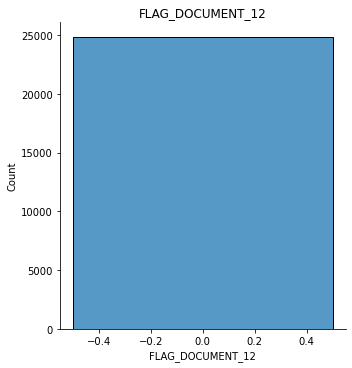

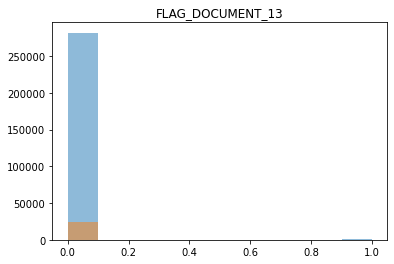

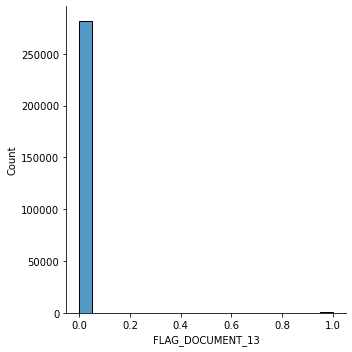

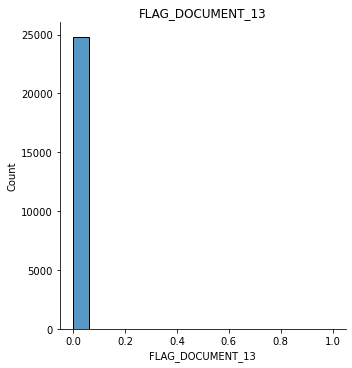

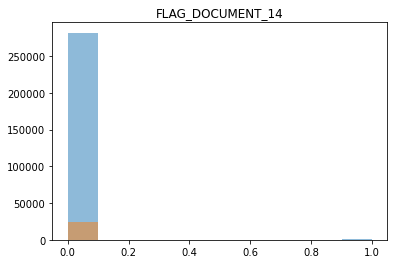

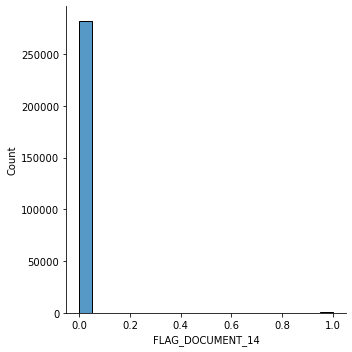

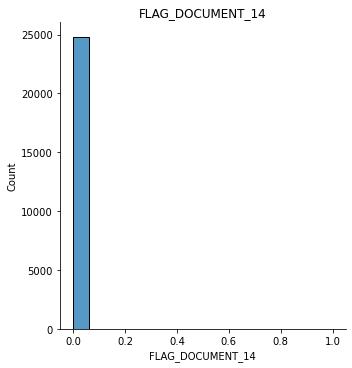

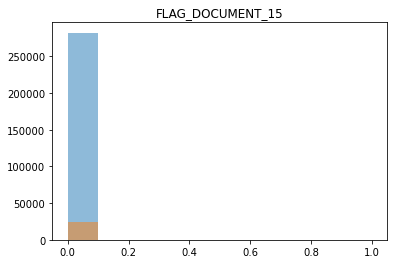

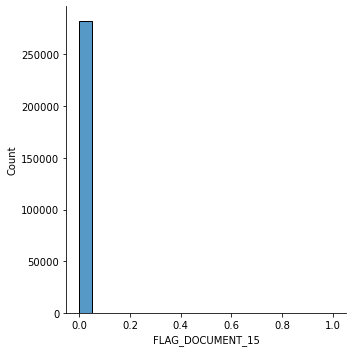

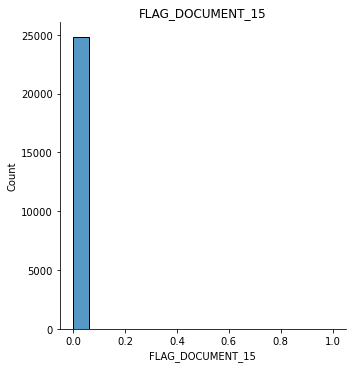

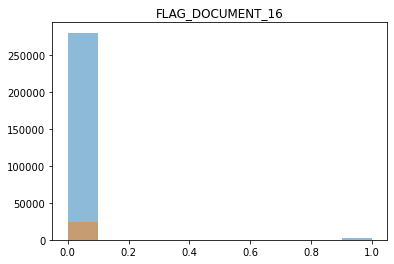

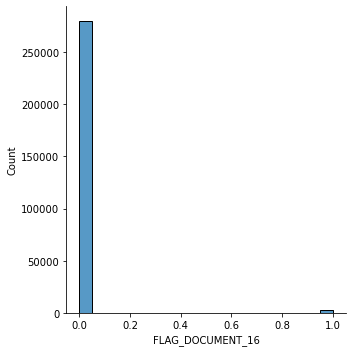

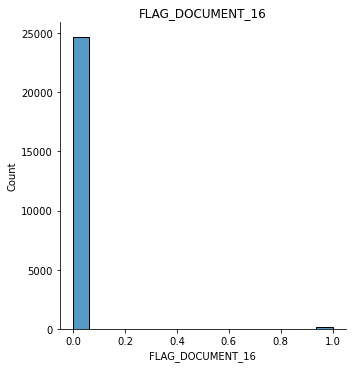

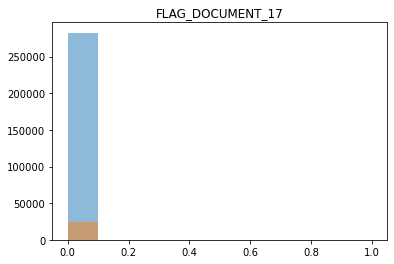

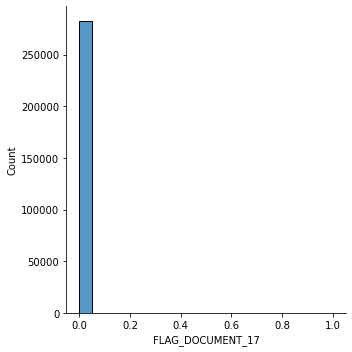

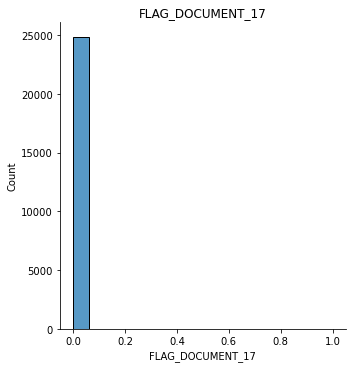

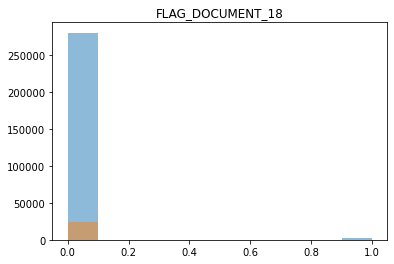

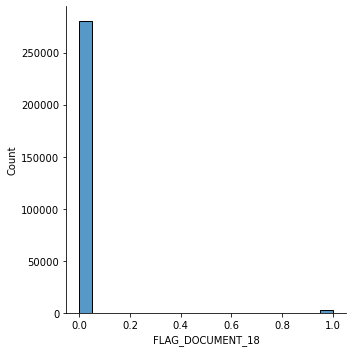

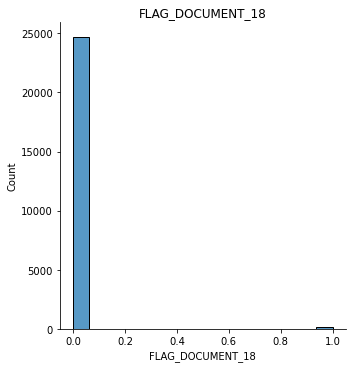

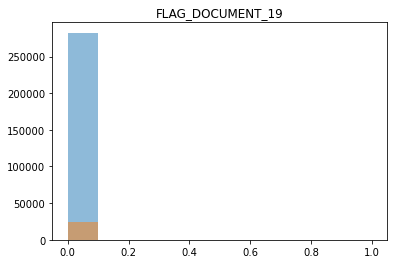

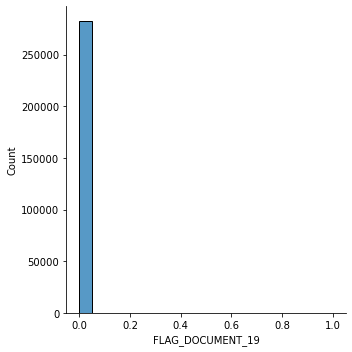

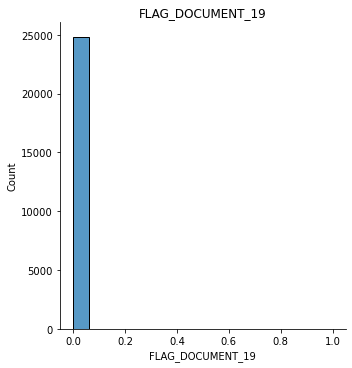

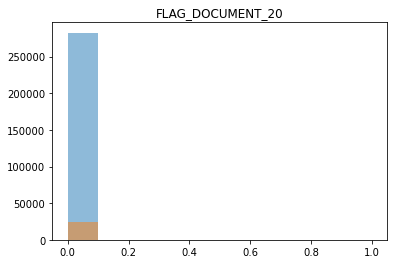

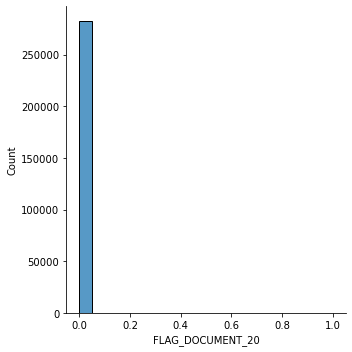

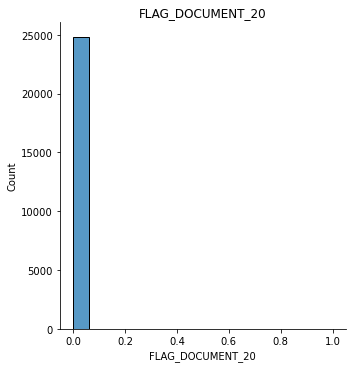

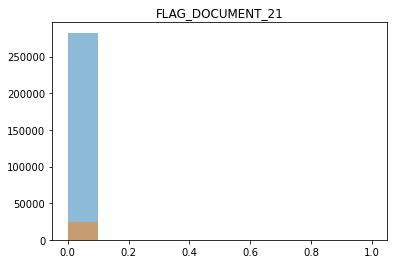

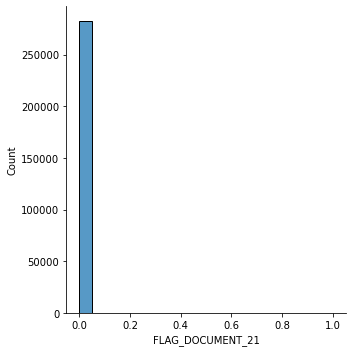

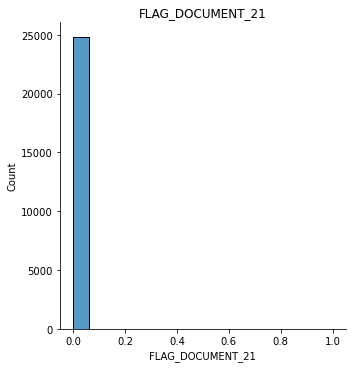

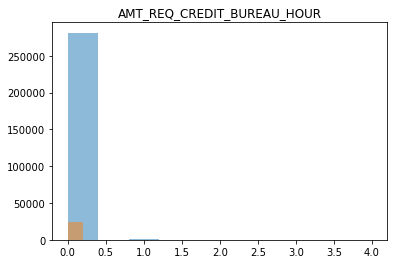

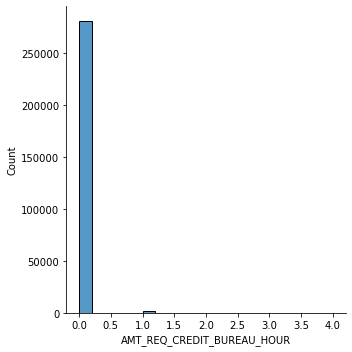

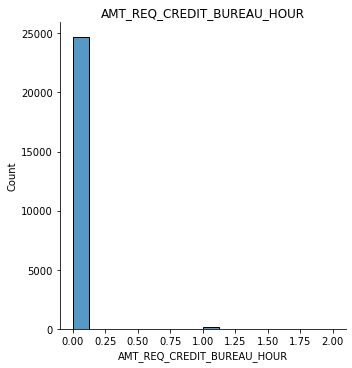

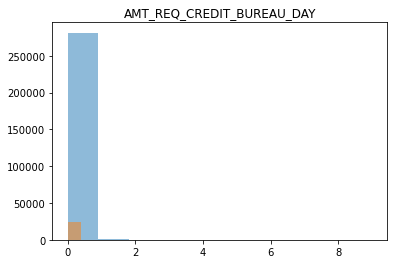

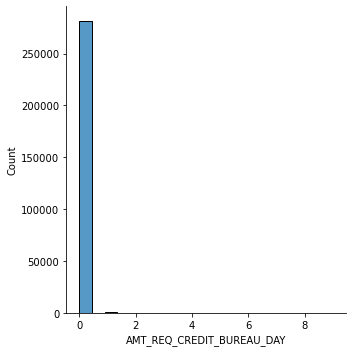

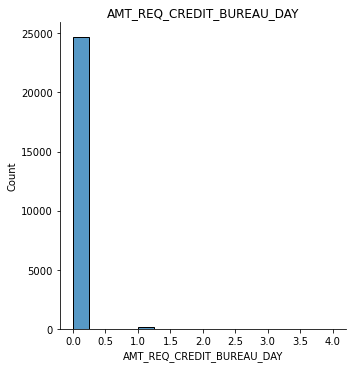

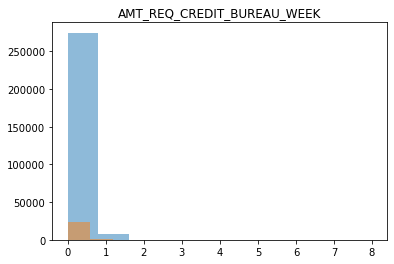

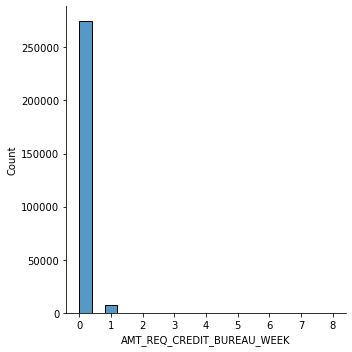

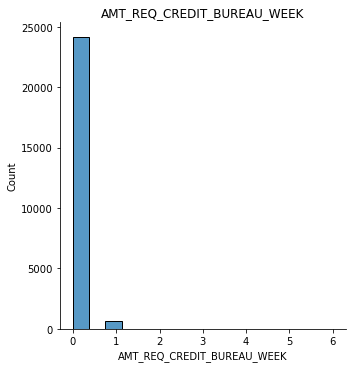

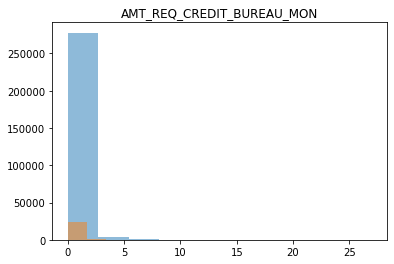

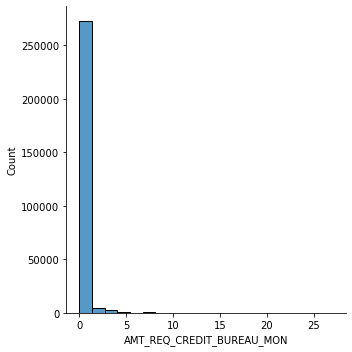

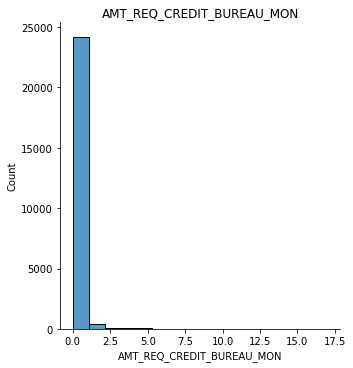

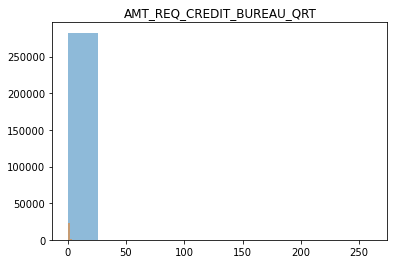

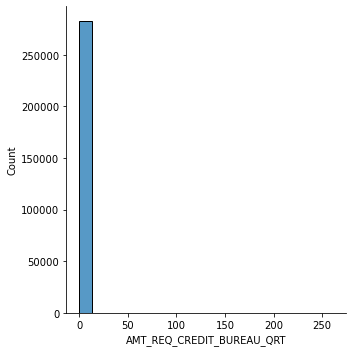

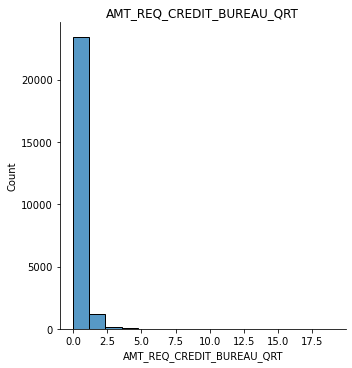

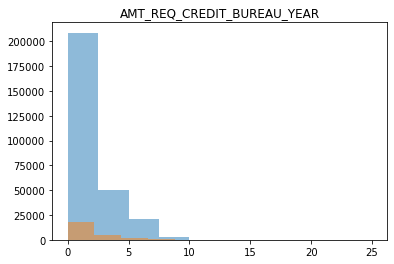

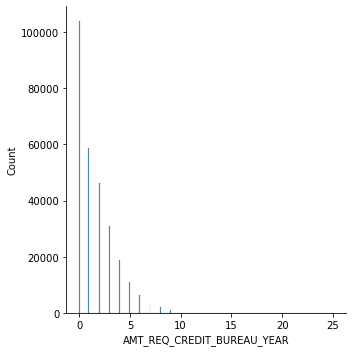

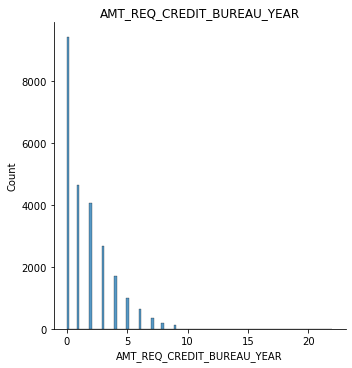

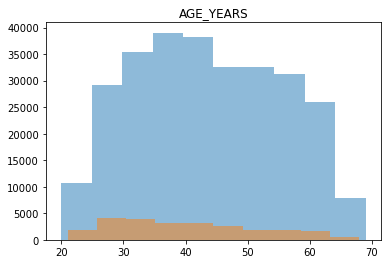

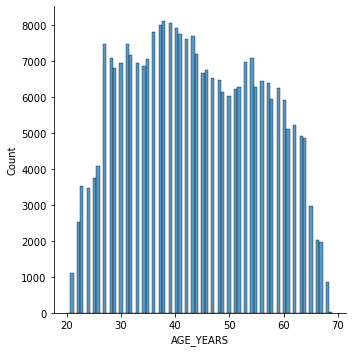

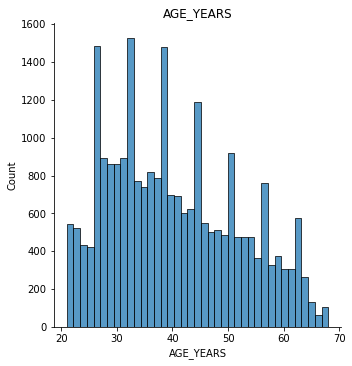

In [77]:
# Lets do univariate analysis for numerical variables
for column in numr_cols:
    plt.hist(train_0[column],alpha=0.5,label='0')
    plt.hist(train_1[column],alpha=0.5,label='1')
    plt.title(column)
    plt.show()
    
    sns.displot(train_0[column], label='0')
    sns.displot(train_1[column], label='1')
    plt.title(column)
    plt.show()
    print("========================================================")

In [78]:
# Lets find Top 10 corelations for numerical columns and then will perform bivariate analysis on these columns using scatterplot
inp1.corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000 -0.002108     -0.001129   
TARGET                       -0.002108  1.000000      0.019187   
CNT_CHILDREN                 -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL             -0.001820 -0.003982      0.012882   
AMT_CREDIT                   -0.000343 -0.030369      0.002145   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.001879 -0.001306     -0.001083   
AMT_REQ_CREDIT_BUREAU_MON     0.000328 -0.014794     -0.007983   
AMT_REQ_CREDIT_BUREAU_QRT     0.000809 -0.005833     -0.004913   
AMT_REQ_CREDIT_BUREAU_YEAR    0.003665  0.005522     -0.029618   
AGE_YEARS                     0.001467 -0.078234     -0.330893   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.001820   -0.000343    -0.000431   
TARGET                             -0.003982   -0.030369    -0.012815   
CNT_CHILDREN                        0.012882    0.002145     0.021377   
AMT_INCOME_TOTAL                    1.000000    0.156870     0.191657   
AMT_CREDIT                          0.156870    1.000000     0.770127   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_WEEK          0.003950    0.001634     0.013494   
AMT_REQ_CREDIT_BUREAU_MON           0.026746    0.055536     0.037171   
AMT_REQ_CREDIT_BUREAU_QRT           0.007924    0.020379     0.010685   
AMT_REQ_CREDIT_BUREAU_YEAR          0.019922   -0.026404    -0.005758   
AGE_YEARS                          -0.027226    0.055408    -0.009453   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                        -0.000258                    0.000849   
TARGET                            -0.039623                   -0.037227   
CNT_CHILDREN                      -0.001856                   -0.025573   
AMT_INCOME_TOTAL                   0.159632                    0.074796   
AMT_CREDIT                         0.986734                    0.099738   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_WEEK         0.001880                   -0.002335   
AMT_REQ_CREDIT_BUREAU_MON          0.057337                    0.071630   
AMT_REQ_CREDIT_BUREAU_QRT          0.020811                   -0.001873   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.028703                   -0.001137   
AGE_YEARS                          0.053484                    0.029648   

                            DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
SK_ID_CURR                   -0.001500       0.001366          -0.000973   
TARGET                        0.078239      -0.044932           0.041975   
CNT_CHILDREN                  0.330938      -0.239818           0.183395   
AMT_INCOME_TOTAL              0.027261      -0.064223           0.027805   
AMT_CREDIT                   -0.055436      -0.066838           0.009621   
...                                ...            ...                ...   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.004014       0.002505          -0.001060   
AMT_REQ_CREDIT_BUREAU_MON    -0.003580      -0.032416          -0.010617   
AMT_REQ_CREDIT_BUREAU_QRT    -0.016281       0.013466          -0.001340   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.077783       0.041543          -0.021997   
AGE_YEARS                    -0.999711       0.615807          -0.331796   

                            DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
SK_ID_CURR                        -0.000384    0.002804       -0.001337   
TARGET                             0.051457    0.000534        0.045982   
CNT_CHILDREN                      -0.028019    0.001041        0.240714   
AMT_INCOME_TOTAL                   0.008506    0.000325        0.063994   
AMT_CREDIT                        -0.006575    0.001436        0.065519   
...                                     ...         ...             ...   
AMT_REQ_CREDIT_BURE

In [79]:
corr_i = inp1.corr().abs().unstack().sort_values(kind='quicksort',ascending=False).dropna()

In [80]:
# Top 10 Corelation for dataset inp1
corr_i[corr_i!=1].head(20)

FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999755
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999755
DAYS_BIRTH                    AGE_YEARS                       0.999711
AGE_YEARS                     DAYS_BIRTH                      0.999711
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998491
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998491
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997260
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997260
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993825
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993825
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989001
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989001
AMT_GOODS_PRICE               AMT_CREDIT                      0.986734
AMT_CREDIT                    AMT_GOODS_PRICE                 0.986734
FLOORS

In [81]:
# Top 10 Corelation for dataset with TARGET variable 0
corr_0 = train_0.corr().abs().unstack().sort_values(kind='quicksort',ascending=False).dropna()
corr_t10_0 = corr_0[corr_0!=1].head(20)
corr_t10_0

DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999758
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999758
DAYS_BIRTH                    AGE_YEARS                       0.999711
AGE_YEARS                     DAYS_BIRTH                      0.999711
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998510
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998510
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997253
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997253
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993582
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993582
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988955
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988955
AMT_CREDIT                    AMT_GOODS_PRICE                 0.987022
AMT_GOODS_PRICE               AMT_CREDIT                      0.987022
FLOORS

In [82]:
[corr_t10_0.index[i][0] for i in range(len(corr_t10_0))]

['DAYS_EMPLOYED',
 'FLAG_EMP_PHONE',
 'DAYS_BIRTH',
 'AGE_YEARS',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE']

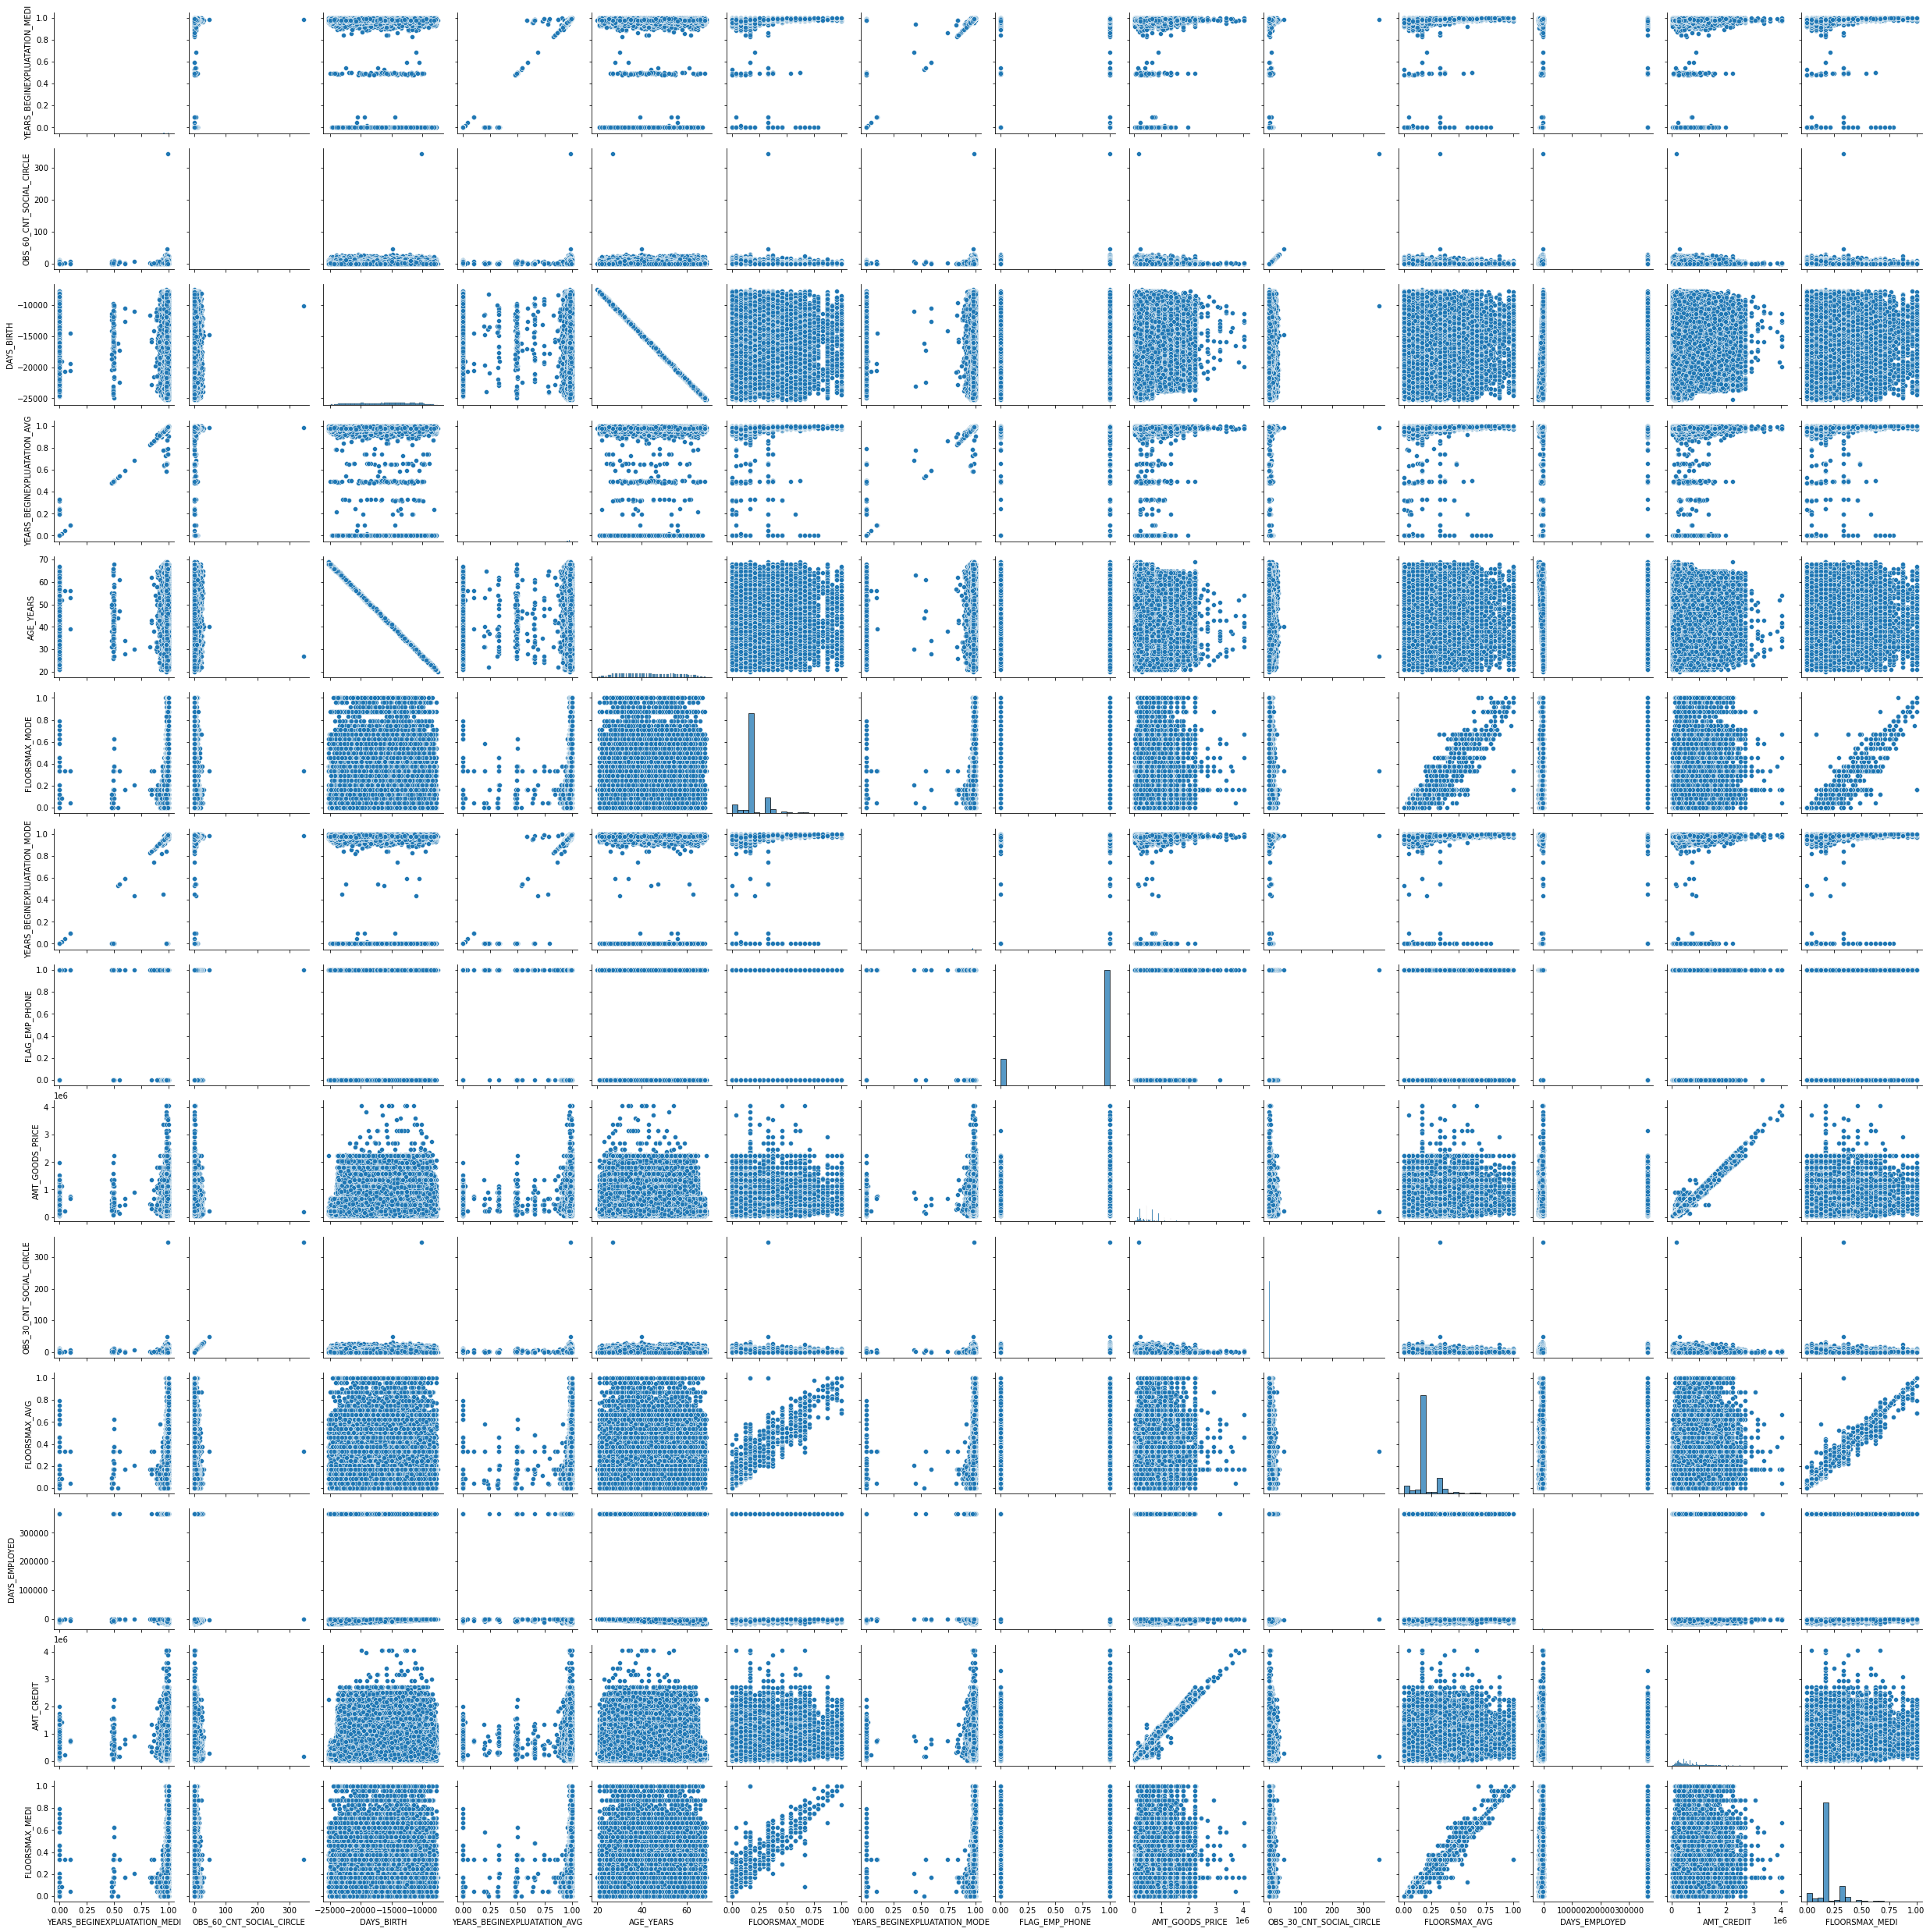

In [83]:
sns.pairplot(train_0[set([corr_t10_0.index[i][0] for i in range(len(corr_t10_0))])])
plt.show()

In [84]:
# Add Observations here train_0
# AMT_GOODS_PRICE and AMT_CREDIT : Strong positive linear realtionship

In [85]:
# Top 10 Corelation for dataset with TARGET variable 1
corr_1 = train_1.corr().abs().unstack().sort_values(kind='quicksort',ascending=False).dropna()
corr_t10_1 = corr_1[corr_1!=1].head(20)
corr_t10_1

FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999702
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999702
DAYS_BIRTH                    AGE_YEARS                       0.999691
AGE_YEARS                     DAYS_BIRTH                      0.999691
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998270
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998270
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997295
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997295
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996125
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996125
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989472
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989472
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986935
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986935
AMT_GO

In [86]:
set([corr_t10_1.index[i][0] for i in range(len(corr_t10_1))])

{'AGE_YEARS',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_EMP_PHONE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE'}

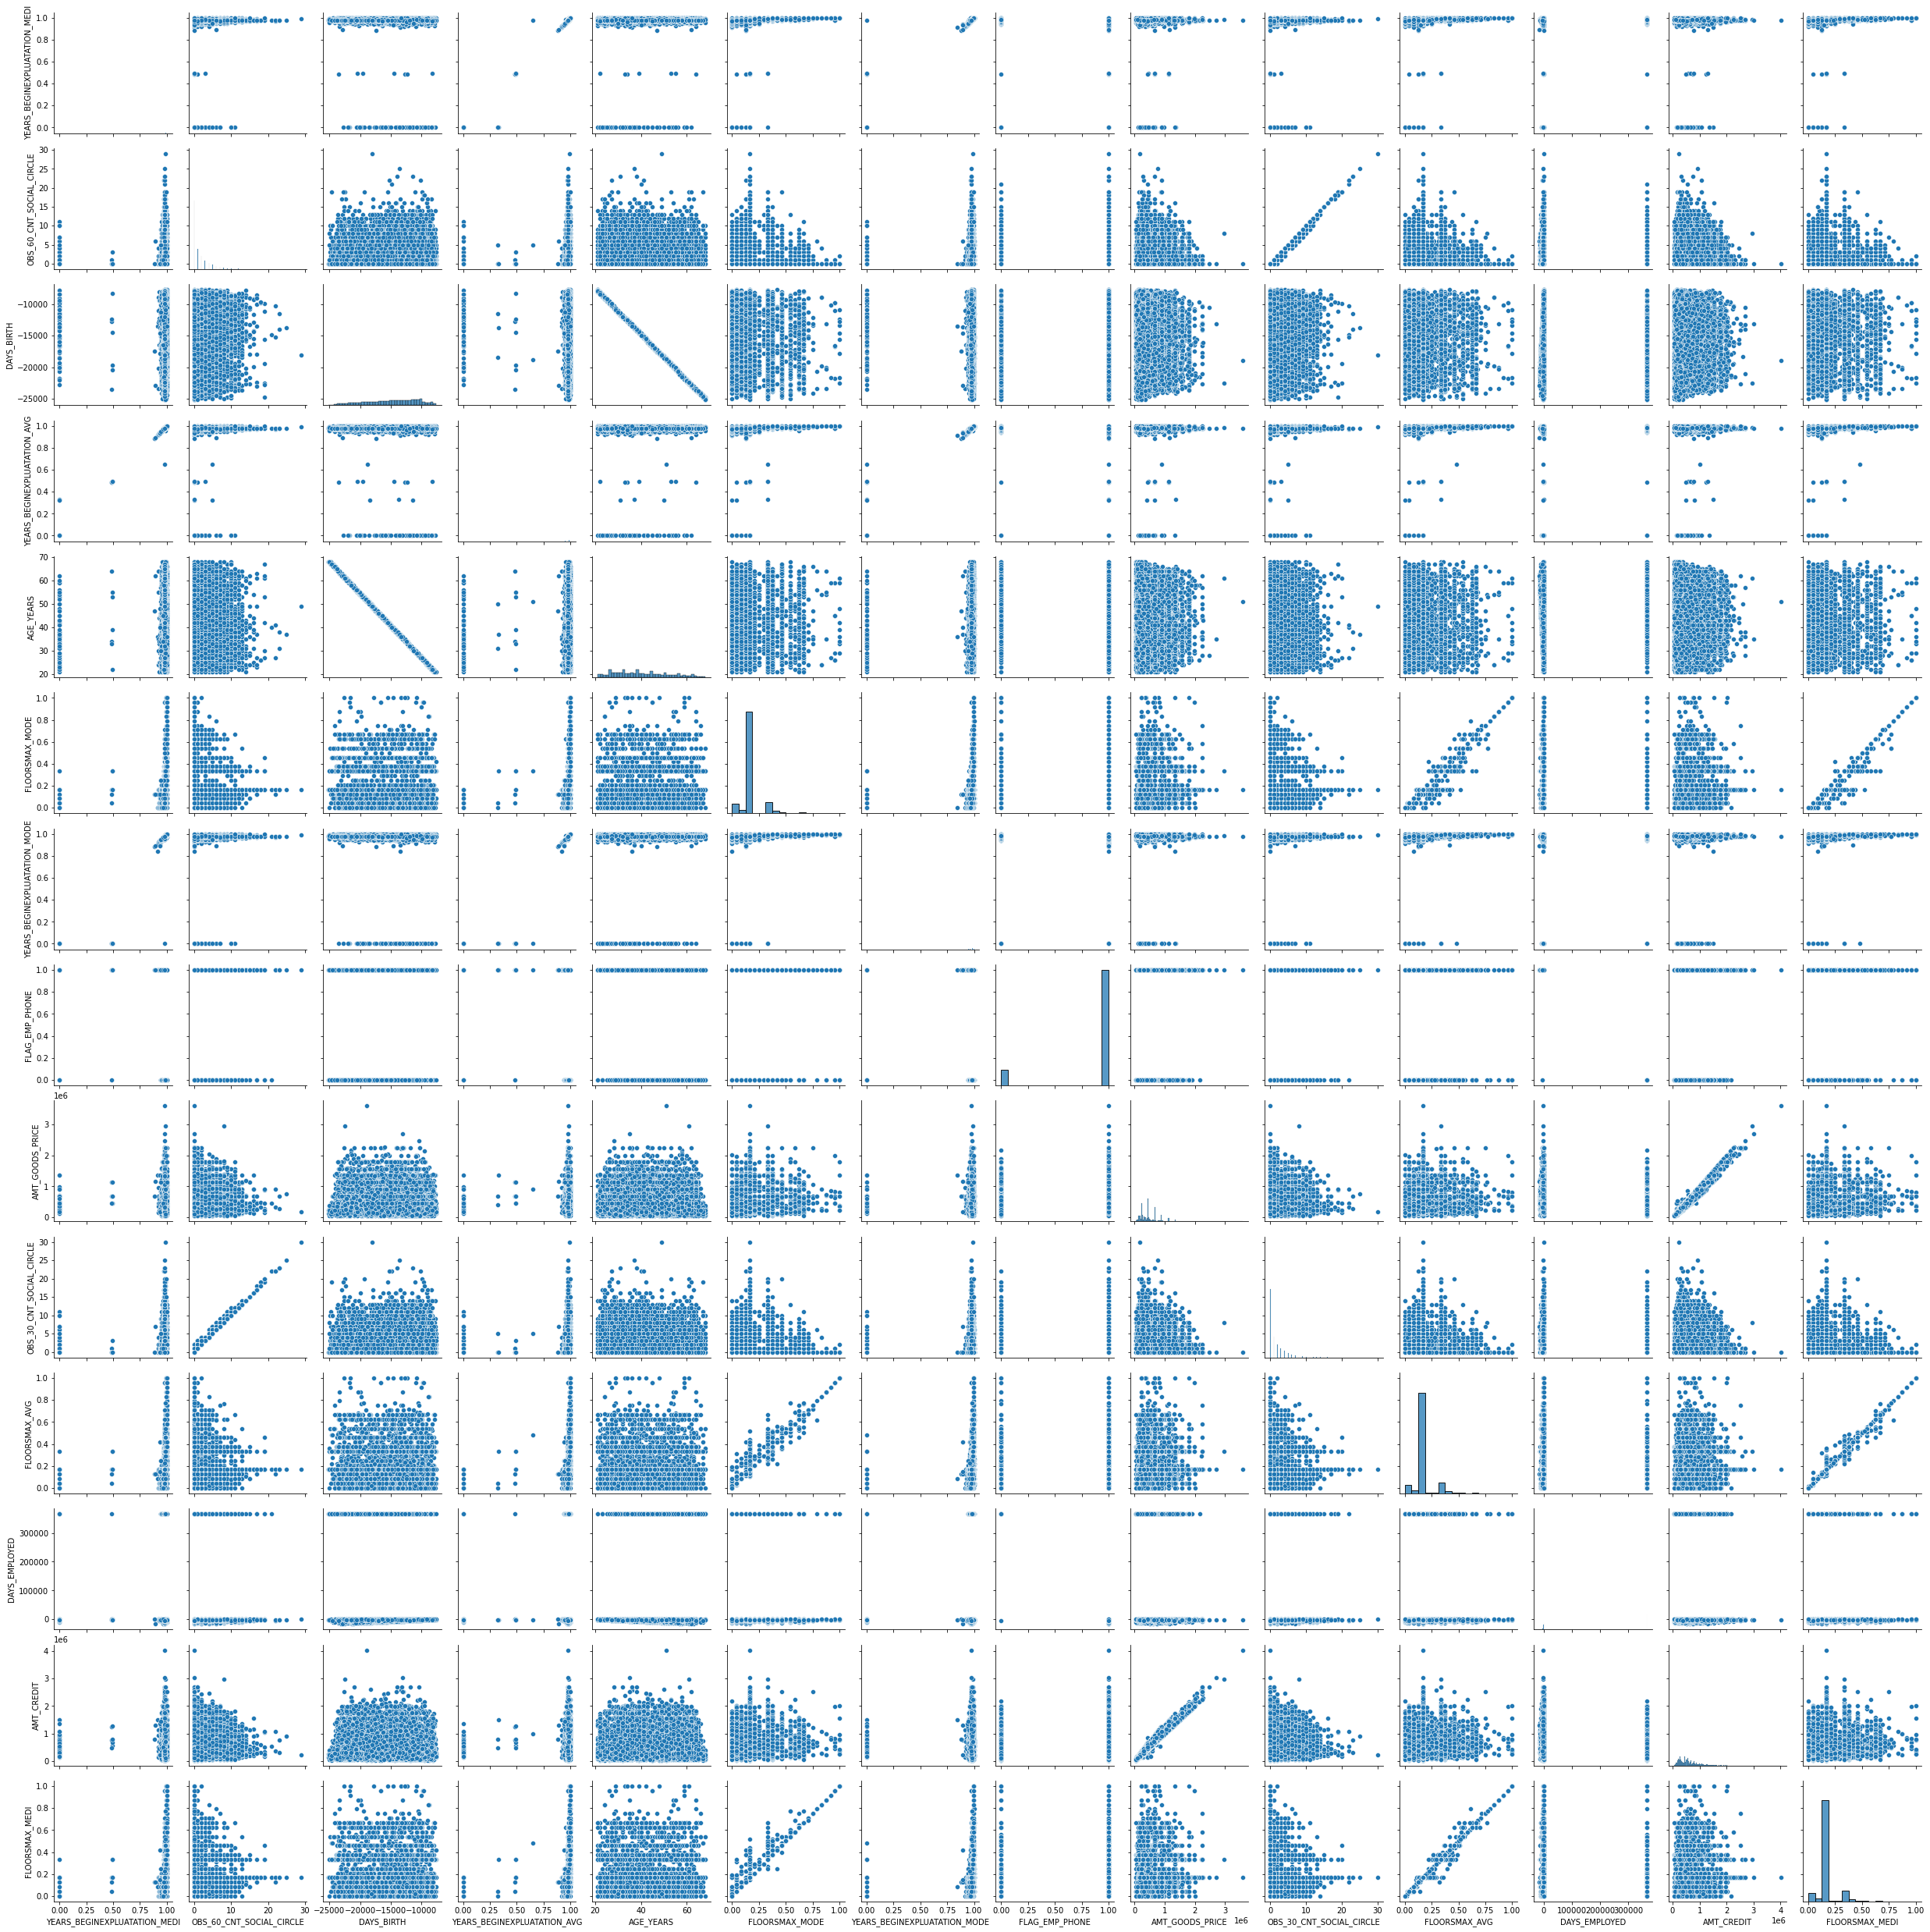

In [87]:
sns.pairplot(train_1[set([corr_t10_1.index[i][0] for i in range(len(corr_t10_1))])])
plt.show()

In [88]:
# Add Observations here train_1
# As the OBS_30_CNT_SOCIAL_CIRCLE count increases the AMT_GOODS_PRICE value decreases
# As the OBS_60_CNT_SOCIAL_CIRCLE count increases the AMT_GOODS_PRICE value decreases
# As the OBS_30_CNT_SOCIAL_CIRCLE count increases the AMT_CREDIT value decreases
# As the OBS_60_CNT_SOCIAL_CIRCLE count increases the AMT_CREDIT value decreases
# OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE : Strong positive linear realtionship
# As FLOORMAX_* increases OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE count decreases

# Previous Application

In [89]:
inp2 = pd.read_csv('previous_application.csv')
inp2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [90]:
inp2.shape

(1670214, 37)

In [91]:
# merge both data frames inp1 and inp2 using inner join
merged_inp = inp1.merge(inp2,left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [92]:
merged_inp.shape

(1413701, 124)

In [110]:
merged_inp.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.003541      -16765          -1188            -1186.0   
3                    0.003541      -16765          -1188            -1186.0   
4                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2             -291           1               1                0   
3             -291           1               1                0   
4            -2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                  

# Bi-Variate/Multi-Variate Analysis

In [120]:
anlys_col = ['CAT_AMT_GOODS_PRICE','NAME_EDUCATION_TYPE','AGE_GROUPS','EMP_EXP_GROUP','CAT_AMT_ANNUITY','NAME_PORTFOLIO','CAT_AMT_INCOME_TOTAL','NAME_CONTRACT_STATUS']

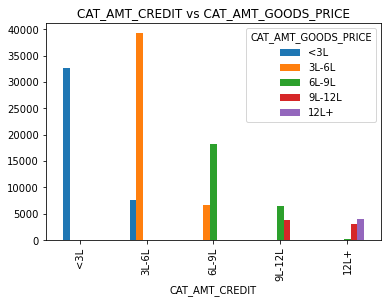

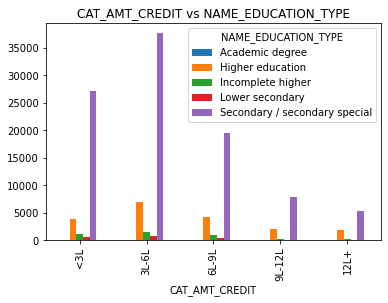

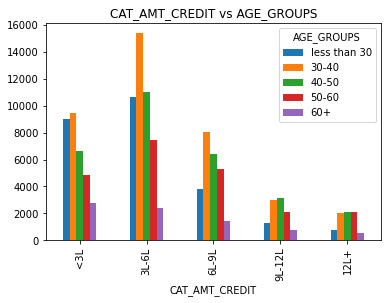

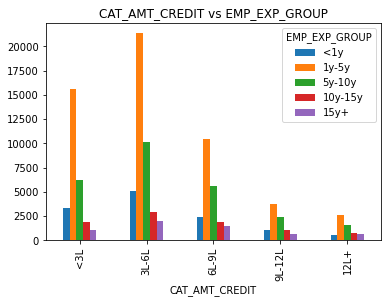

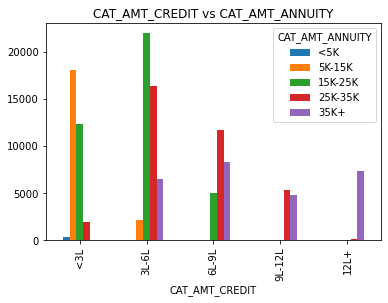

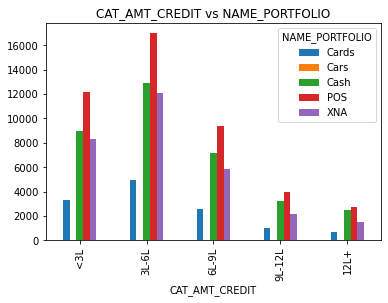

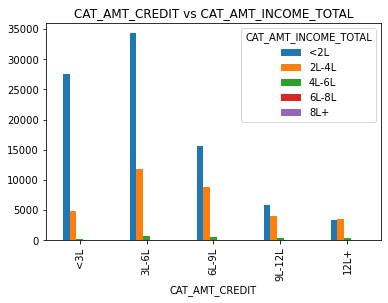

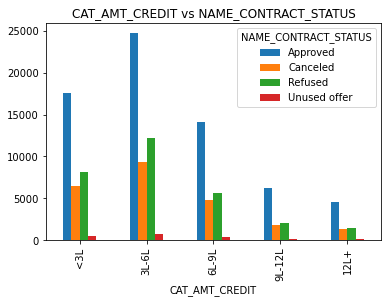

In [121]:
# Looping above columns instead of repeating same thing again
for column in anlys_col:
    pd.pivot_table(data=merged_inp,index="CAT_AMT_CREDIT", columns=column, values='TARGET',aggfunc='sum').plot.bar()
    plt.title('CAT_AMT_CREDIT vs '+column)
    plt.show()
    print("========================================================")

In [122]:
# Clients having goods price and credit amount <3L or between 3L-6L were having the most payment difficulties
# Clients having secondary education type has the largest count of people having loan repayment issues where credit amount was beteen 3L-6L
# Clients in the age group of 30-40 are having difficulties in loan repayment where credit amount is between 3L-6L
# Clients having experience between 1-5 years were having difficulties in loan repayment for credit amount <3L and 3L-6L
# Clients having annuity amount between 5-15K having credit amount <3L had payment difficulties. Similarly clients having annuity amount between 15-25K having credit amount 3L-6L had payment difficulties.
# Clients having name portfolio as POS are more likey to have payment difficulties
# Clients having income <2L with credit amount <3L and 3L-6L were having payment difficulties. In second case the income of the client is half or less than half of the credit amount sanctioned.

<AxesSubplot:xlabel='CAT_AMT_ANNUITY'>

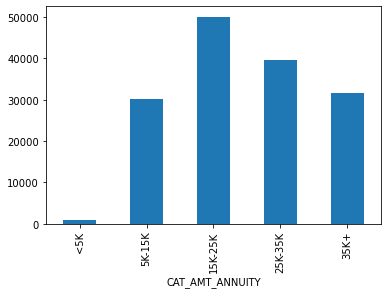

In [123]:
merged_inp.groupby('CAT_AMT_ANNUITY')['DEF_60_CNT_SOCIAL_CIRCLE'].sum().plot.bar()

# Conclusion

- Clients with loan credits less than 6L have higher chances of  payment defaults. Thus, we can give loans less than 6L with a higher interest rate.
- Target clients having work experience of more than 5 years. For clients with work experience between 1 to 5 years or age between 30 to 40 charge higher interest rates.
- Charge higher interests for clients having portfolio POS.
- Reject loans for clients whose income is less than 2 lakhs and loan credit amount is more than double or sanction loan amount comparable to their income.
- Reject loans for clients where more than 3 variables from above satisfy the client details otherwise charge a higher interest rate with less loan credit amount